In [103]:
library(ggplot2)
library(dplyr)
library(tidyverse)
# install.packages("corrplot")
library(corrplot)
# install.packages("qqplotr")
library(qqplotr)
library(broom)

set.seed(5)


In [85]:
# install.packages("caTools")
require(caTools)


package 'caTools' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\alexa\AppData\Local\Temp\RtmpgbUysi\downloaded_packages


Loading required package: caTools
Warning message:
"package 'caTools' was built under R version 3.6.3"

In [40]:
toyota_data <- read.csv('toyota.csv')
options(repr.plot.width=16, repr.plot.height=8)


#Analysing car sales data from toyotaS

## Exploratory Data Analysis

In this section I will attempt to get familiar with the dataset so that I am able to use it in further analysis

In [41]:
nrow(toyota_data)

[1] 6738

here we can see that althought the dataset is not massive we still have quite a bit of data to work with.

In [42]:
toyota_sample <- toyota_data %>% sample_frac(size=0.1)

creating a sample for are exploratory analysis is important as it helps prevent accidental p-hacking.


In [43]:
toyota_sample %>% head(10)

model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
Aygo,2019,9550,Manual,100,Petrol,145,56.5,1.0
Aygo,2016,7291,Semi-Auto,31096,Petrol,0,67.0,1.0
Yaris,2016,9700,Manual,15015,Petrol,30,58.0,1.3
Yaris,2016,11401,Automatic,20674,Hybrid,0,86.0,1.5
Aygo,2019,9790,Manual,6546,Petrol,145,57.7,1.0
Yaris,2017,14999,Automatic,3316,Hybrid,0,78.0,1.5
Aygo,2017,7498,Manual,25223,Petrol,145,68.9,1.0
Aygo,2019,8799,Manual,14303,Petrol,145,56.5,1.0
Yaris,2018,13995,Automatic,9114,Hybrid,135,76.3,1.5
Aygo,2018,8788,Manual,14312,Petrol,150,56.5,1.0


From this small sample we can see that price is given to the nearest pound and millage to the nearest mile.


Having taken a very brief look at the dataset as a whole, i will next explore each column in detail to identify further trends that are relivant to the task

### Understanding the assocition between model and price
One would expect the vehicles model to be an important factor in how much it costs.

In [44]:
avg_model_prices <- toyota_sample %>% group_by(model) %>% summarise(avg_price= mean(price))

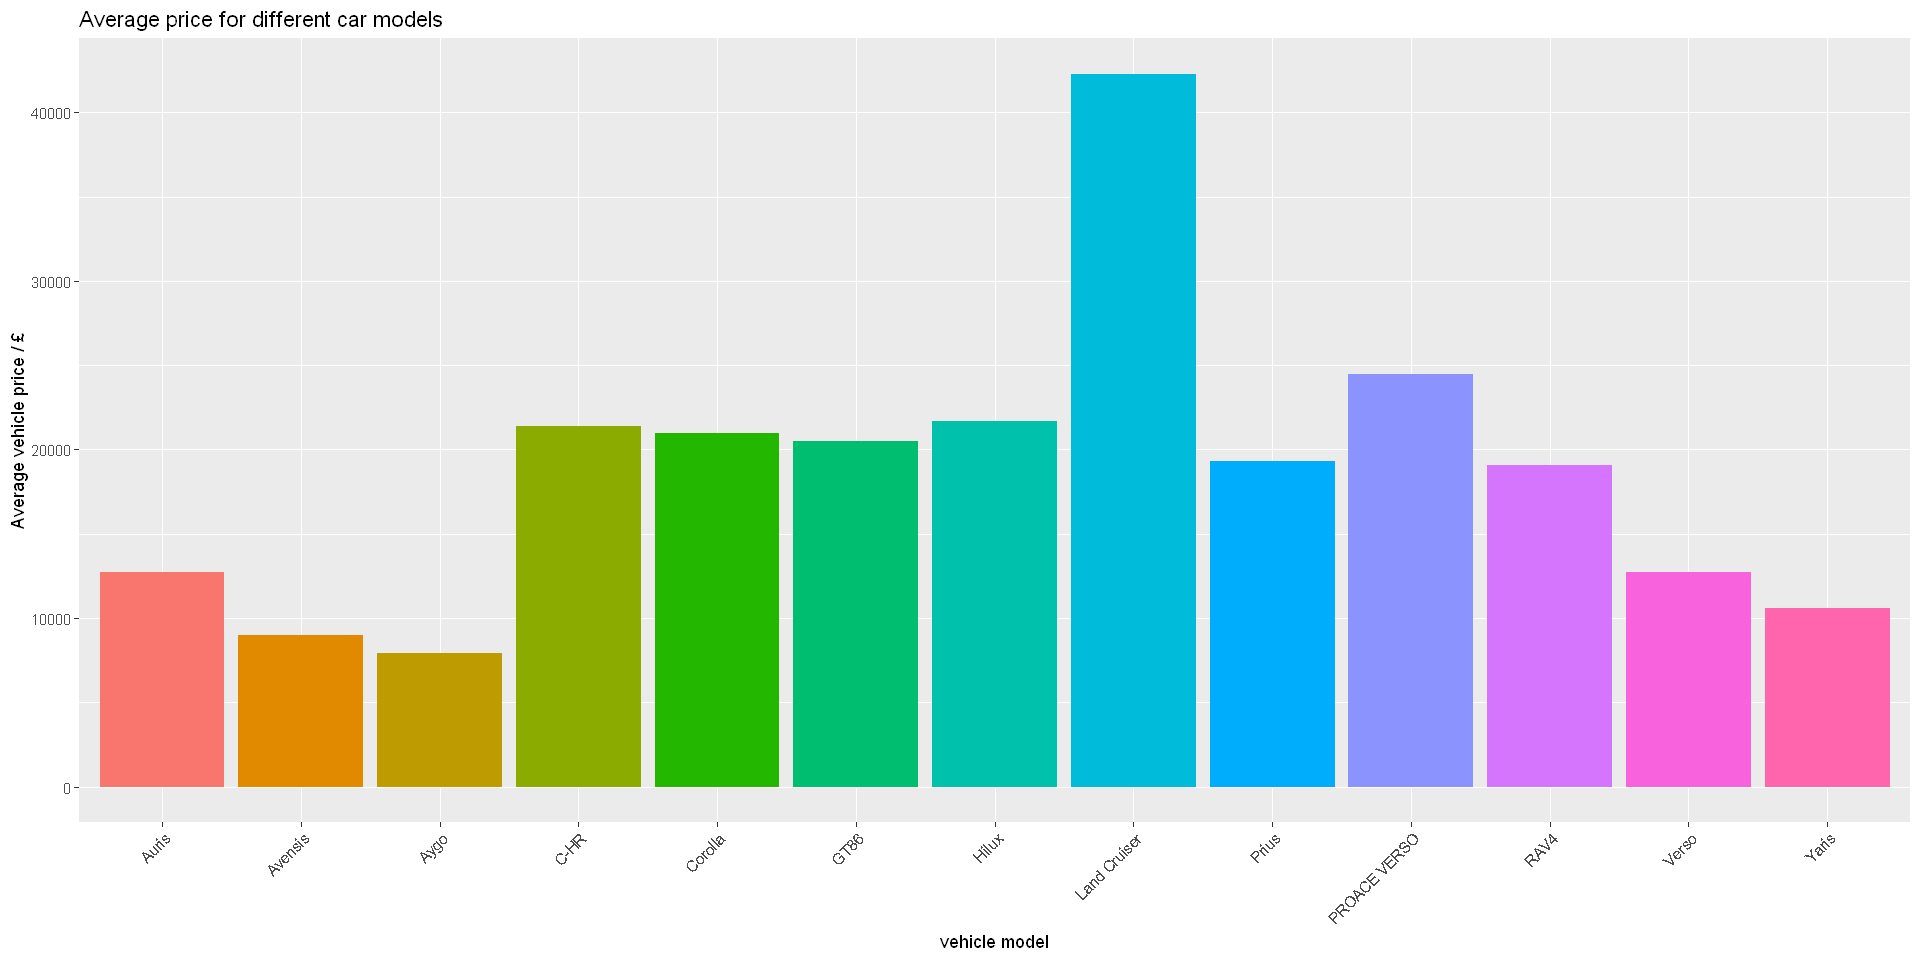

In [45]:
ggplot(avg_model_prices, aes(x=model, fill=model, y=avg_price)) + 
    geom_bar(stat = "identity")+
    theme(axis.text.x=element_text(angle=45, hjust=1), legend.position = "none") +
    labs(x="vehicle model" , y = "Average vehicle price / £", title="Average price for different car models")

This graph (above) shows a large amount of variation in mean price between different vehicle models indicicating that the vehicle model may be a good predictor of its price.

For instance the Toyota Land Cruiser is around 4 times more expensive than the  Toyota Yaris

In [46]:
toyota_data %>% count(model, sort=TRUE)

model,n
Yaris,2122
Aygo,1961
Auris,712
C-HR,479
RAV4,473
Corolla,267
Prius,232
Avensis,115
Verso,114
Hilux,86


In order to understand how informative the sample means we calulated earlier were, it is useful to know how many datapoints there are for each model. In this case since there were very few datapoints for some models their sample means are less informative. Nevertheless it is apparent that significant differences do exist wetween model prices.


### Understanding the price distribution for different models

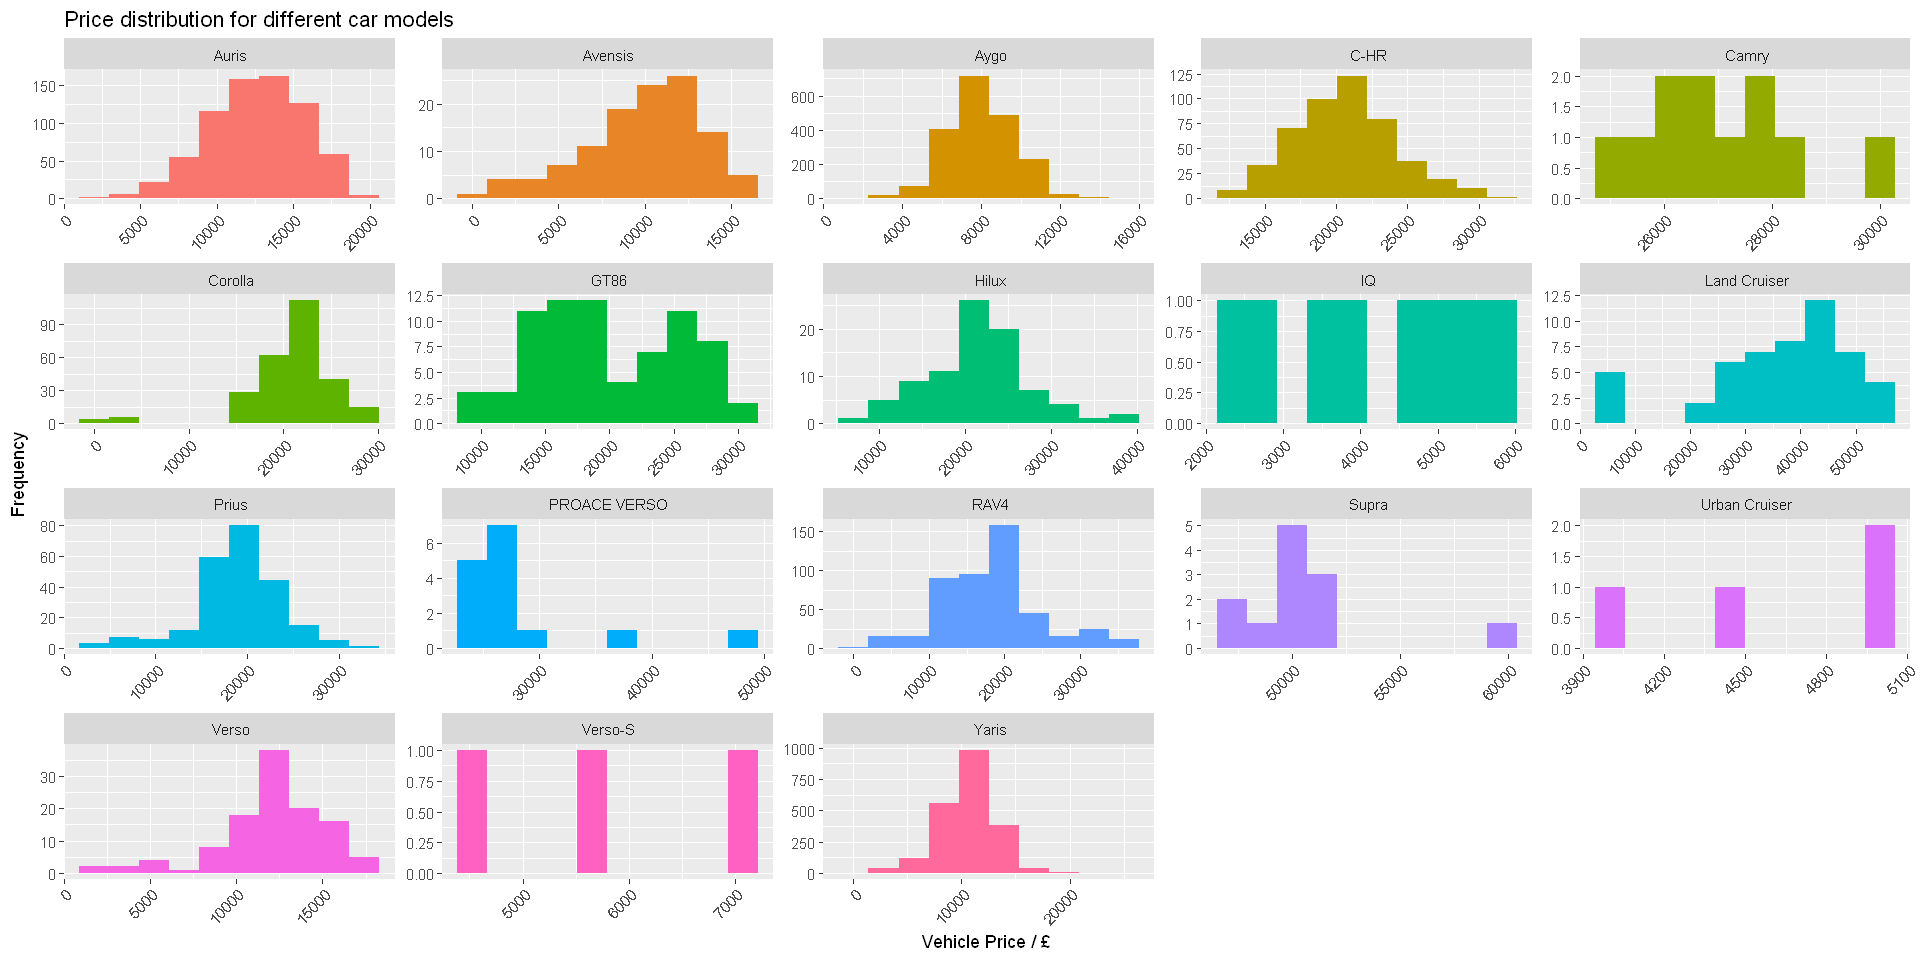

In [216]:
ggplot(toyota_data, aes(x=price, fill=model)) + 
    geom_histogram( position="identity", bins=10)+
    theme(axis.text.x=element_text(angle=45, hjust=1), legend.position = "none")+
    facet_wrap(~model, scales = "free")+
    labs(x="Vehicle Price / £" , y = "Frequency", title="Price distribution for different car models")


From this Graph we can see in most cases the data is approximately normally distributed, in cases where there is little data (fewer than 20 data points) the distribution is unclear. To verify the that the prices follow a normal distribution a normal probability plot can be used

The GT86 appears to be an exception to this as it appears to be bimodal. Consquently it may require further investigation.


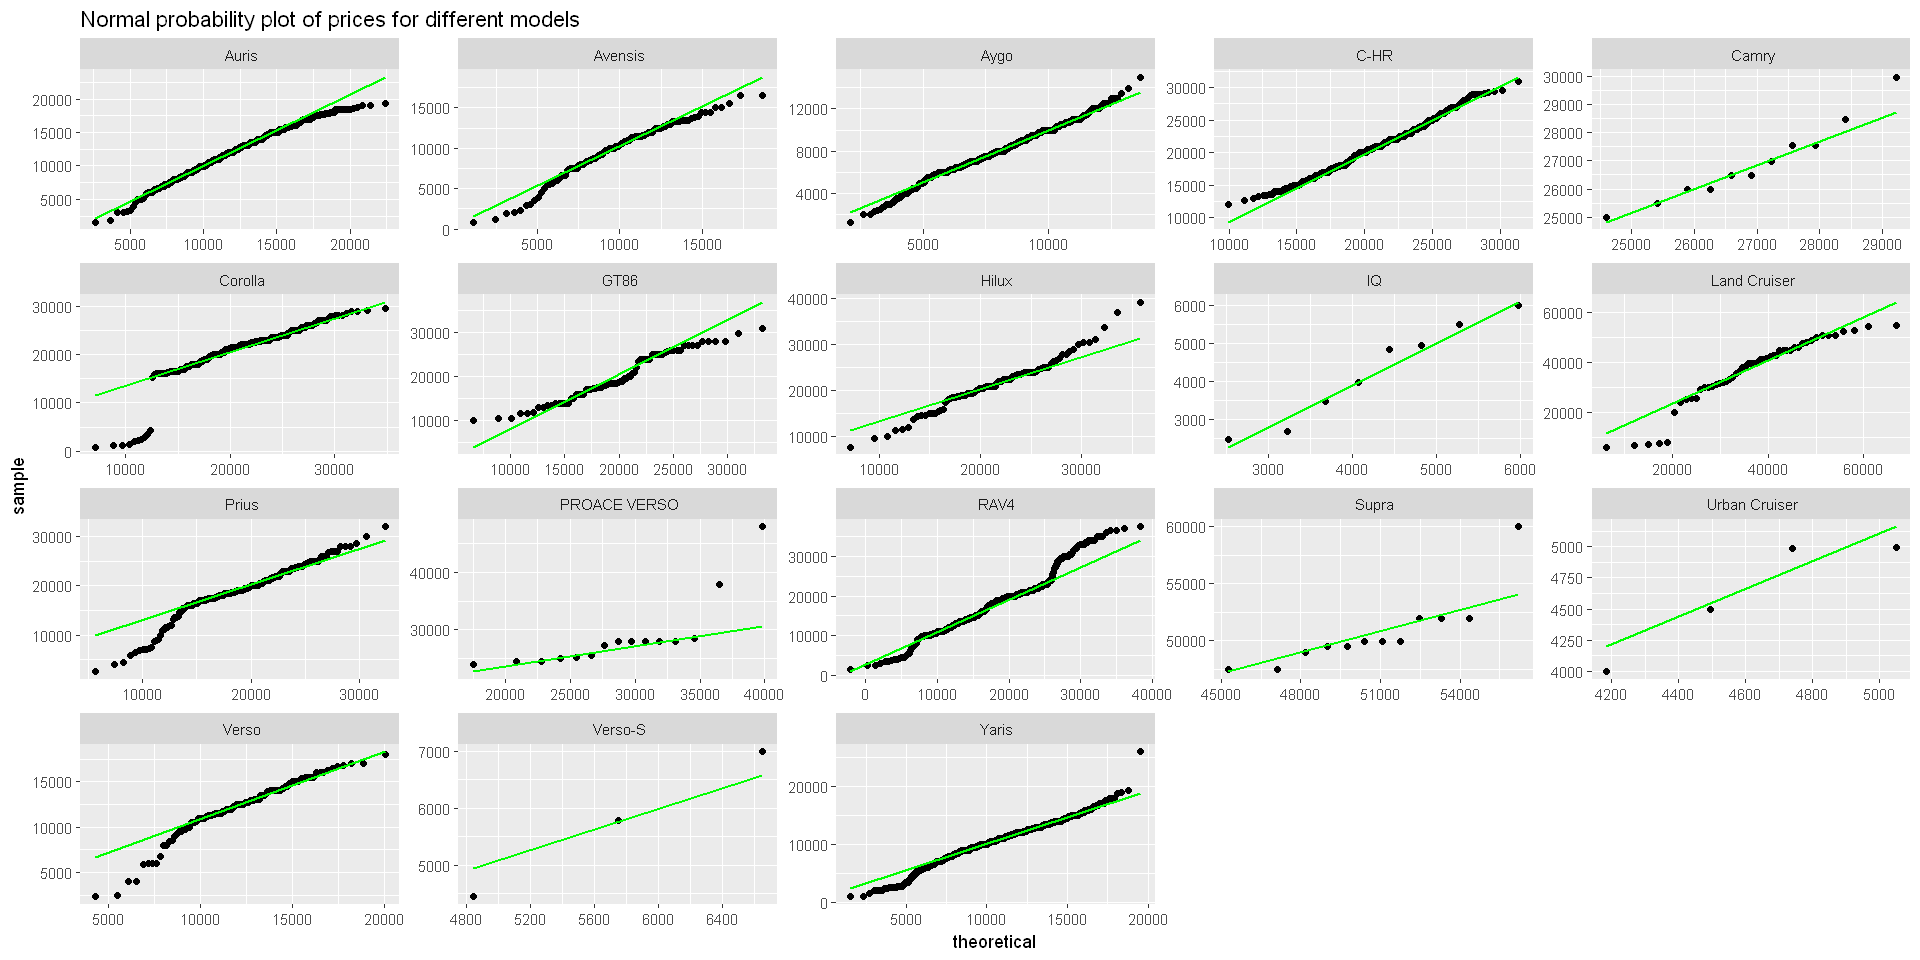

In [48]:
ggplot(toyota_data ,  aes(sample =price )) + 
stat_qq_point() +
stat_qq_line(color="green") + 
    facet_wrap(~model, scales = "free")+
    labs(title="Normal probability plot of prices for different models")

This normal probability plot shows that most car models have prices that are normally distributid as the data is approximately straight. Several show non-linearities when the price is close to its lowest or highest indicating that there may be another factor that is not currently being considered.

But before we do that, let's first revisit the GT86 to try and explain it's bimodal distribution

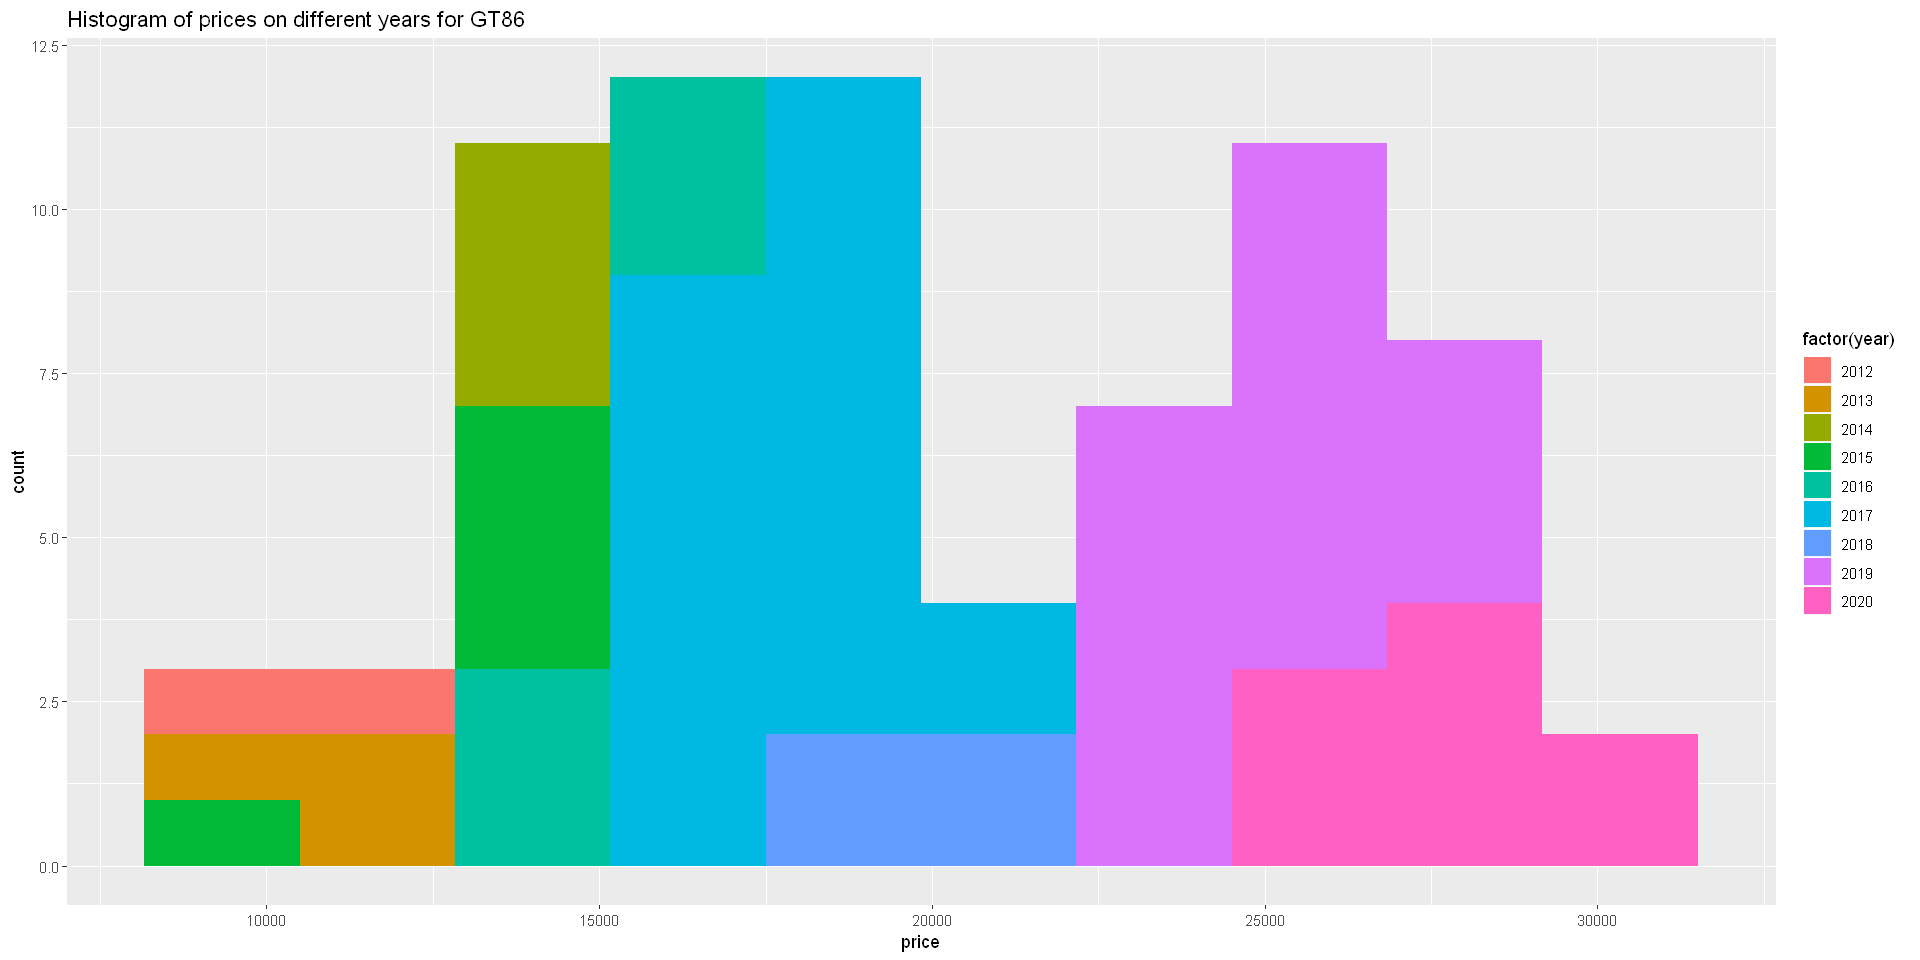

In [237]:
ggplot(toyota_data %>% filter(as.integer(model) == 7), aes(x=price,  ,fill=factor(year))) + geom_histogram(bins=10) +
labs(title="Histogram of prices on different years for GT86 ")

This plot reveals that the year a car was released may explain why the GT86  price distribution appeared bimodal. It seems that the 2018 model was far less popular than one might expect

### Understanding the association between Transmission and price


In [244]:
toyota_sample %>% group_by(model, transmission) %>% count()

model,transmission,n
Auris,Automatic,55
Auris,Manual,15
Avensis,Automatic,1
Avensis,Manual,11
Avensis,Semi-Auto,2
Aygo,Automatic,10
Aygo,Manual,177
Aygo,Semi-Auto,16
C-HR,Automatic,45
C-HR,Manual,8


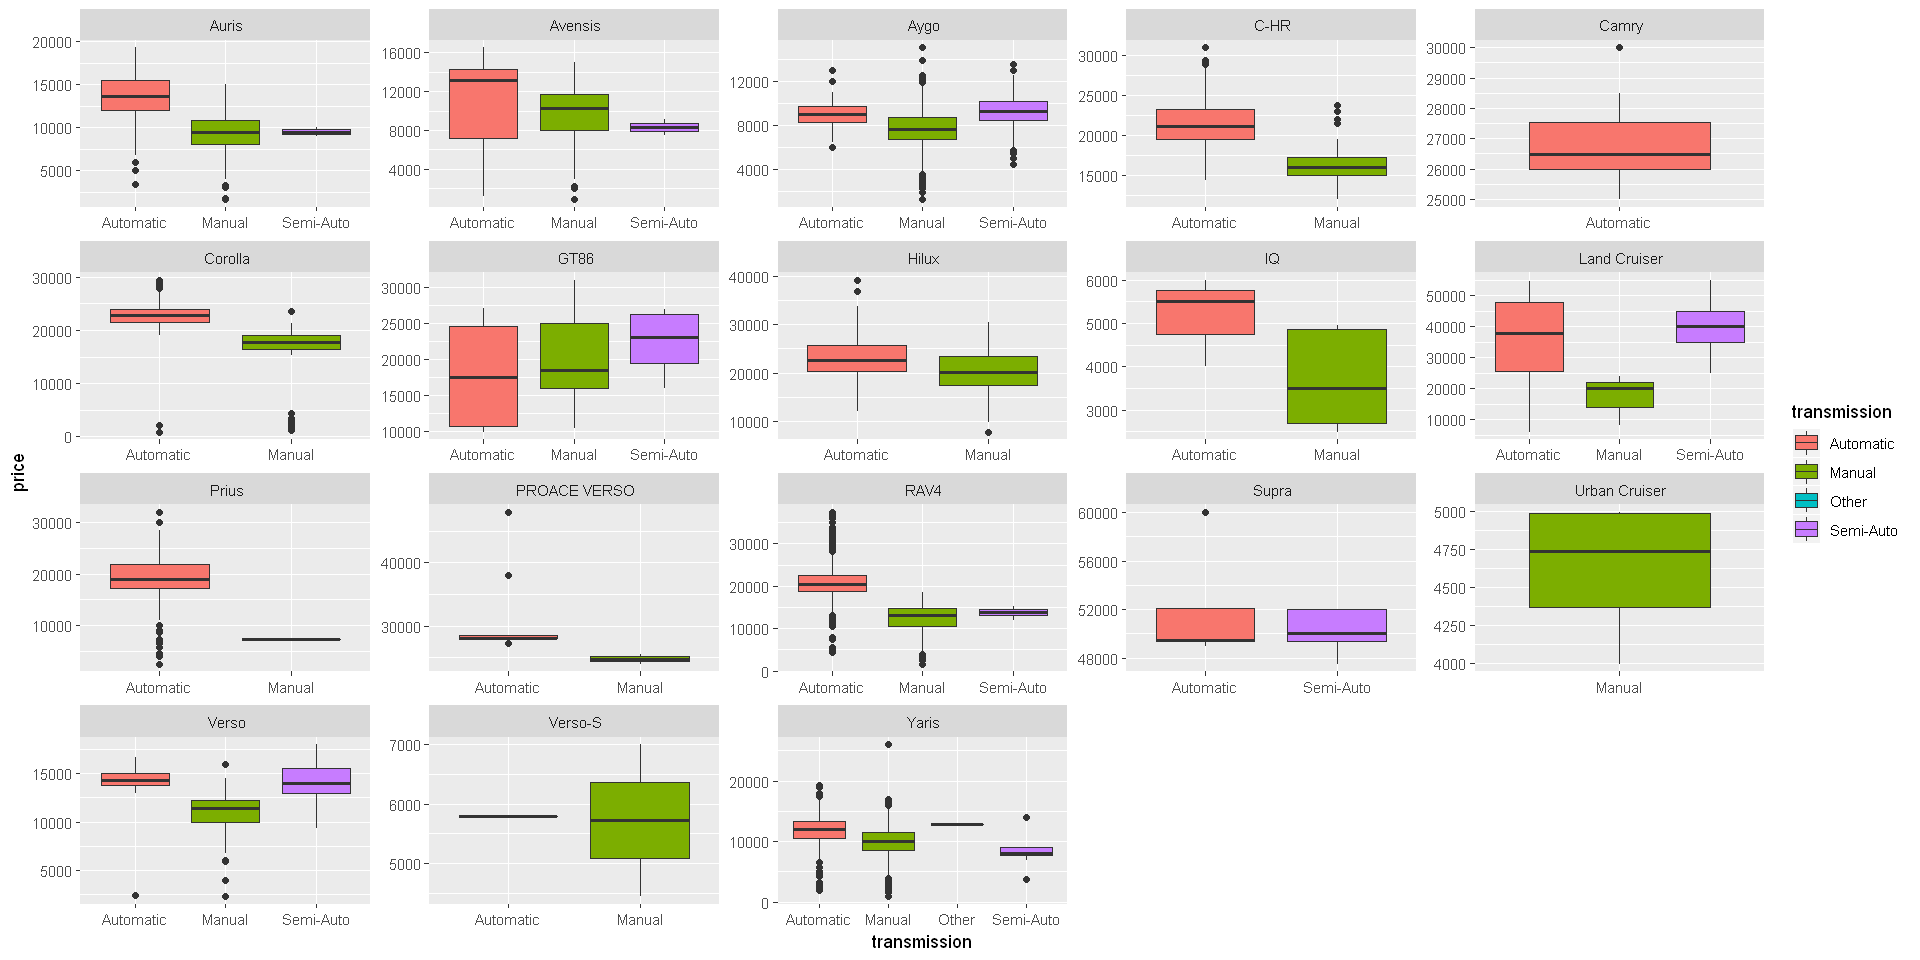

In [251]:
ggplot(toyota_data, aes(x=transmission, y=price)) + 
  geom_boxplot(aes(fill=transmission))+
  facet_wrap(~model, scales = "free") 
# GT86_data %>% summary()

From this plot it appears that  the association between transmission type and price is different for different for different models. For some models the semi-automatic version is has the lowest mean price and for other the highest. 

Using a T test we can confirm whether this difference is significant.

but before we do that let's first check we have enough data

In [289]:
toyota_sample %>% count(transmission, sort=TRUE)

transmission,n
Manual,382
Automatic,267
Semi-Auto,25


since there are so few vehicles whith transmissions labeled as either "semi-auto" or "Other" it would not be appropriate to carry out a hypothosis test, there is simply not enough data to make a valid judgement. 



### Understanding the effect of fuel type on price


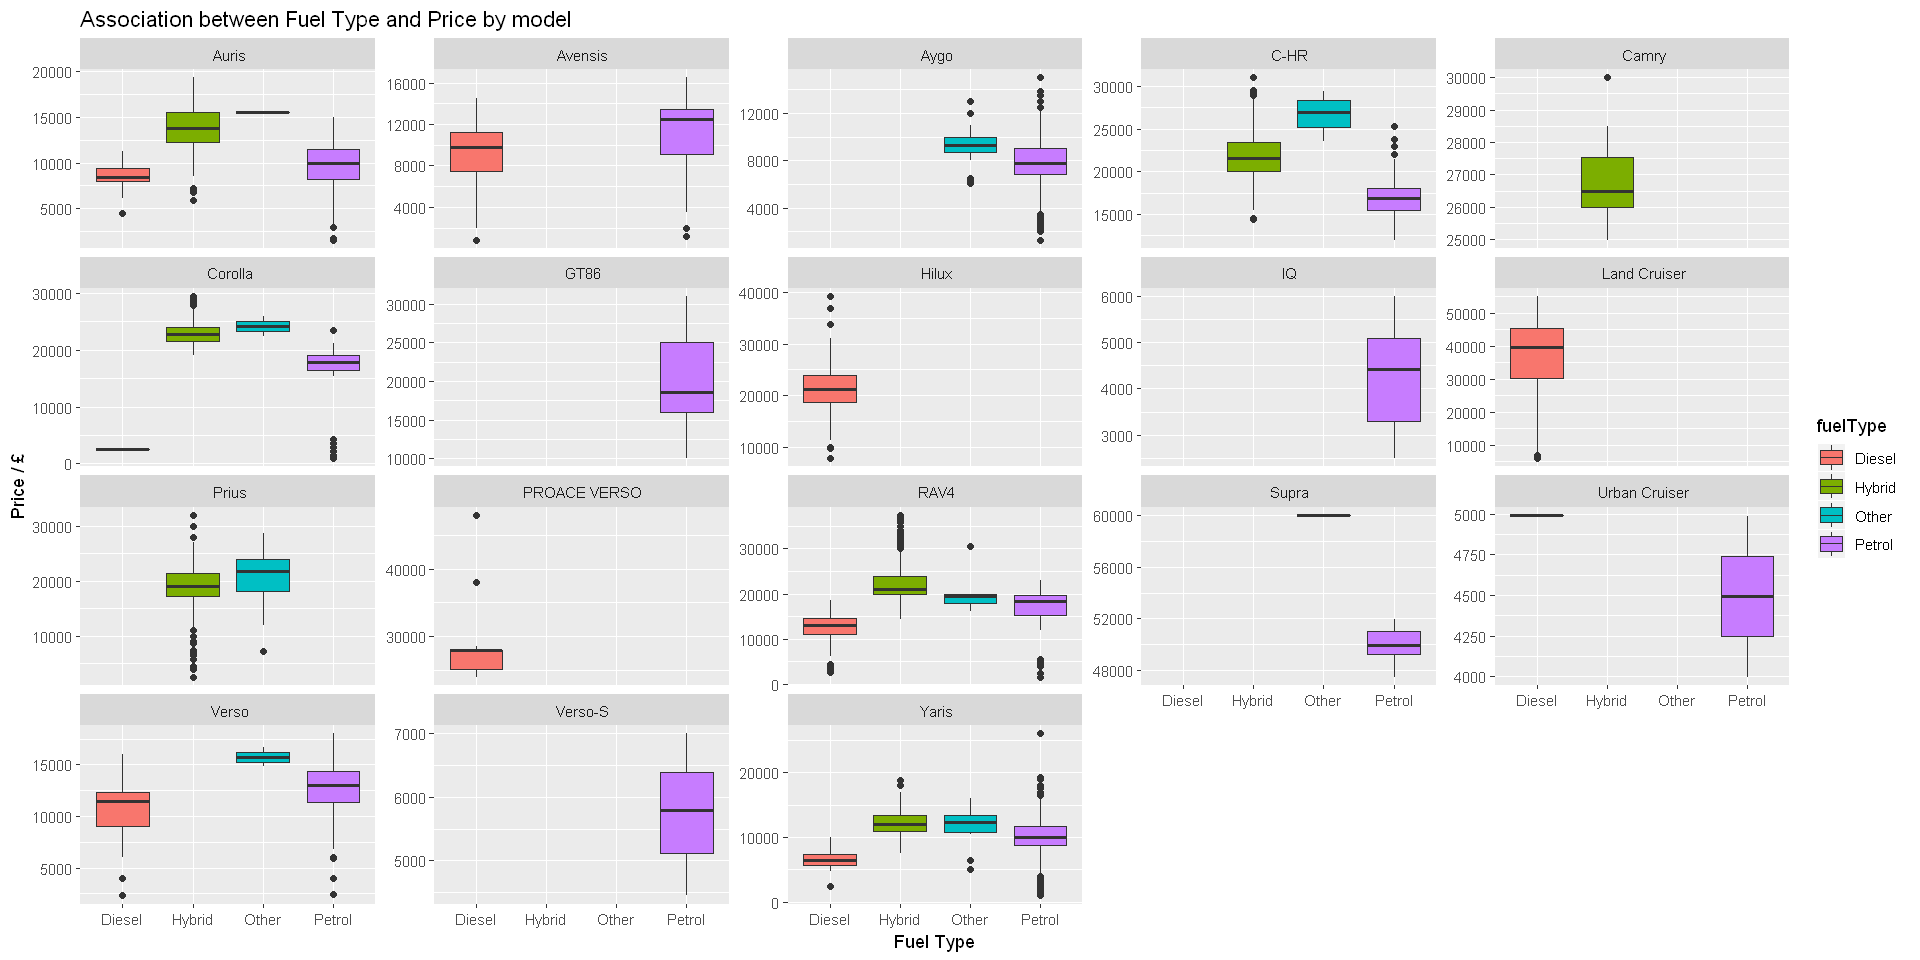

In [51]:
ggplot(toyota_data, aes(x=fuelType, y=price)) + 
  geom_boxplot(aes(fill=fuelType))+
  facet_wrap(~model, scales = "free_y")+
  labs(x="Fuel Type", y="Price / £", title="Association between Fuel Type and Price by model")


when grouping by model the differences in price appear to be very small

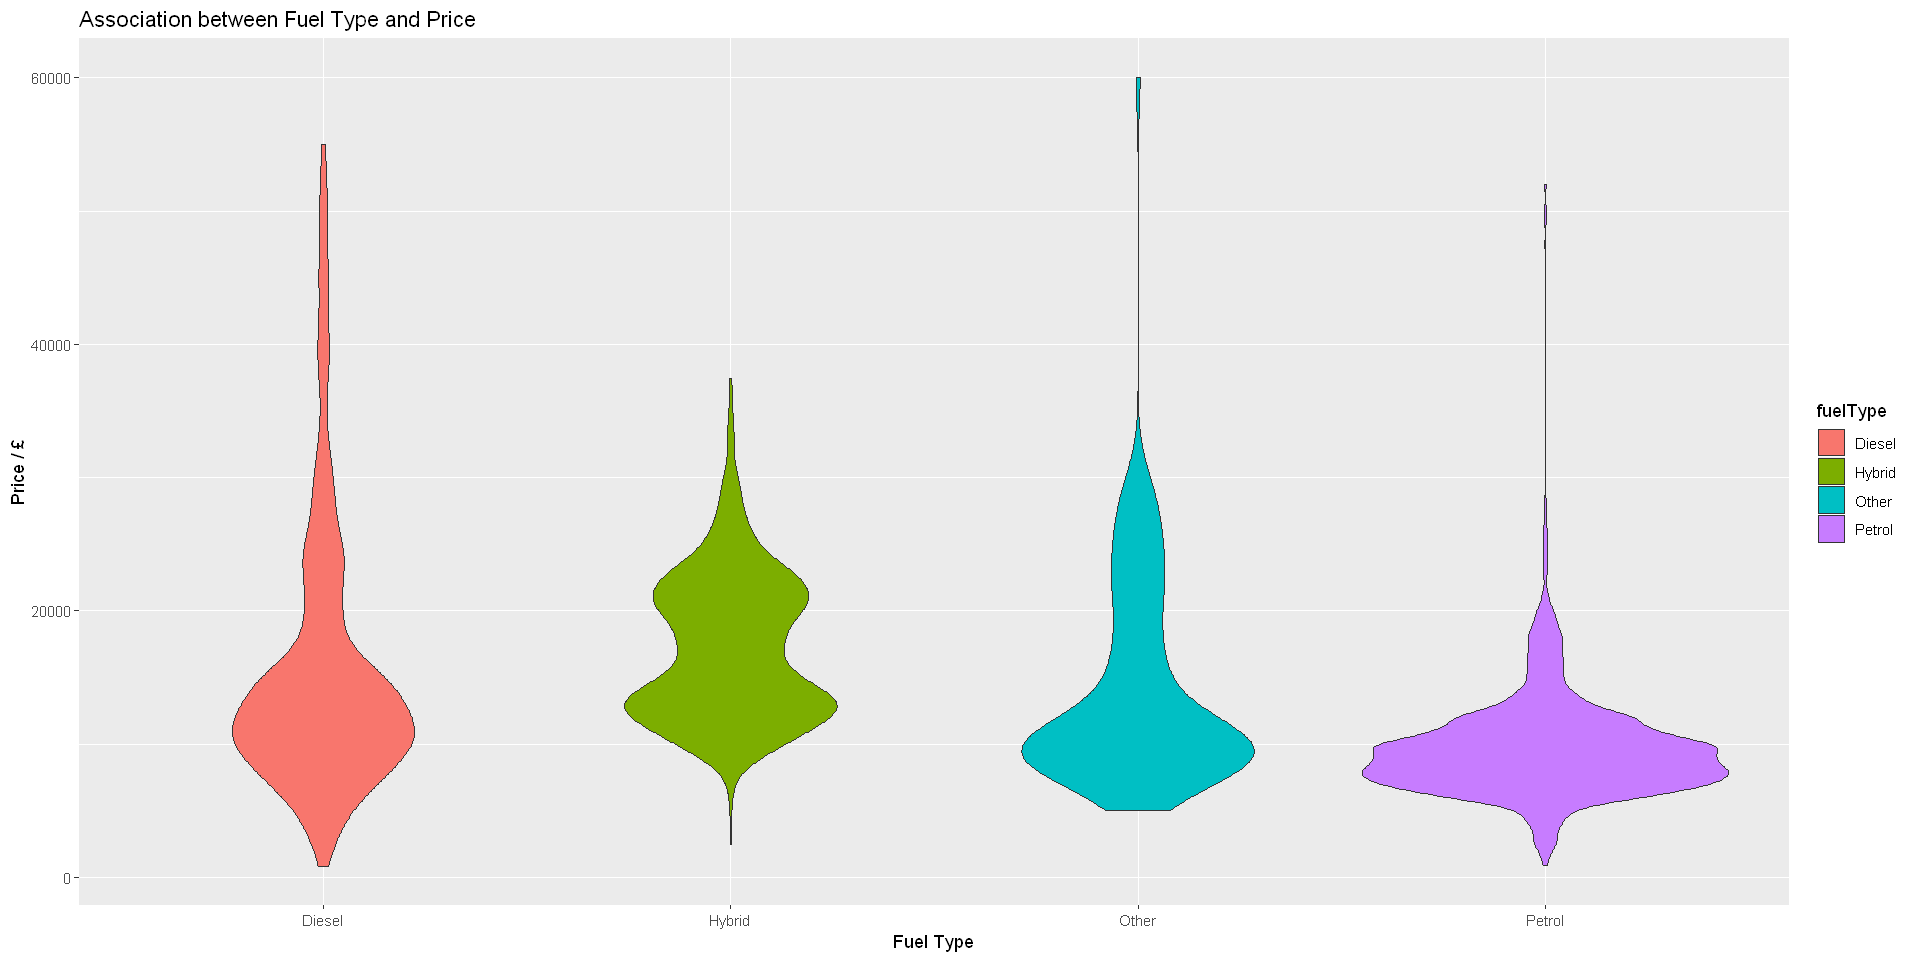

In [52]:
ggplot(toyota_data, aes(x=fuelType, y=price, fill=fuelType)) + 
  geom_violin()+
  labs(x="Fuel Type", y="Price / £", title="Association between Fuel Type and Price")


  

Looking overall at the data it also appears that the different fuel types do not have a strong assiciation with price

Having assessed the categorical variables fuel type, model and transmission type, it appears that only model has a strong association with price. This is a useful insight to take forward into my explanatory and inferential analysis

In the next part of this exploratory analysis we will focus on exploring the numeric variables

### Understanding the effect of vehicles milage on price  

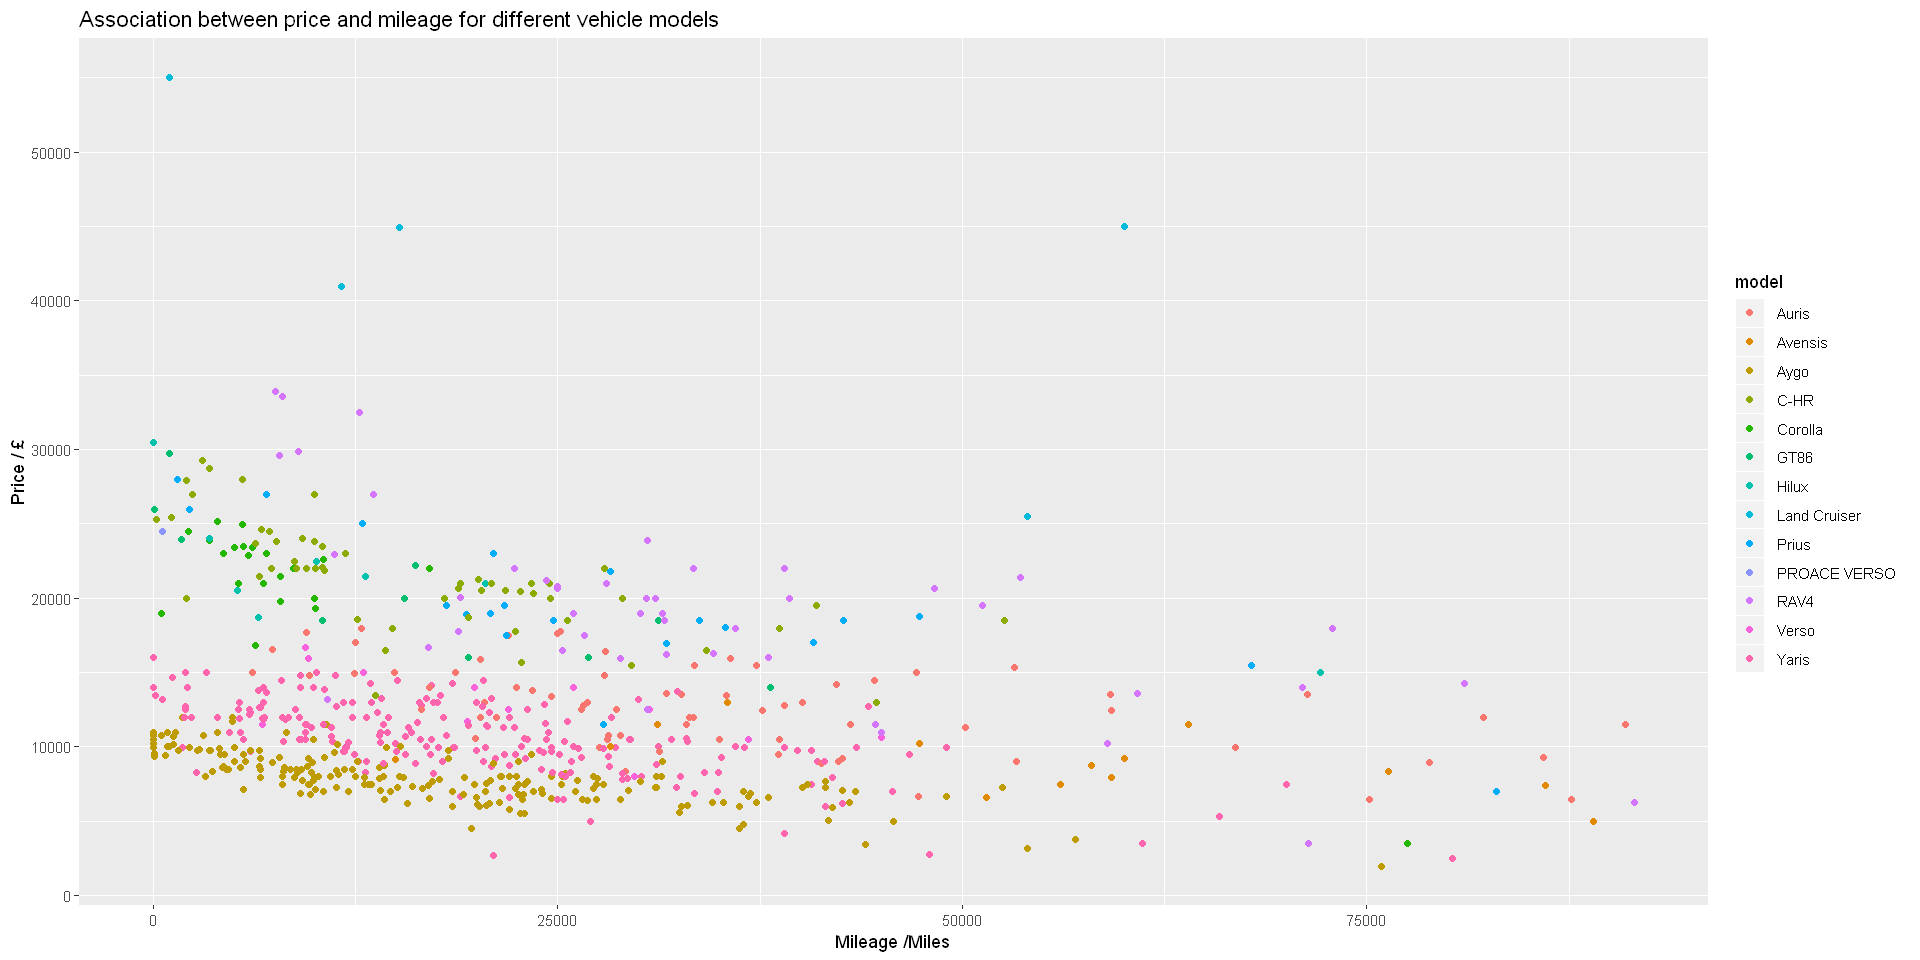

In [53]:
ggplot(toyota_sample, aes(x=mileage, y=price, color=model)) + geom_jitter()+
    labs(x="Mileage /Miles" , y = "Price / £", title="Association between price and mileage for different vehicle models")


From  this graph we can see several things:
* vehicles tend to reduce in price as millage increases
* vehicles that start more expensive tend to loose more value as milage increases
* most vehicles within the dataset have a milage below 50000 miles
it is dificult to see whether the association is linear or not so by plotting the data separately we can get a clearer picture


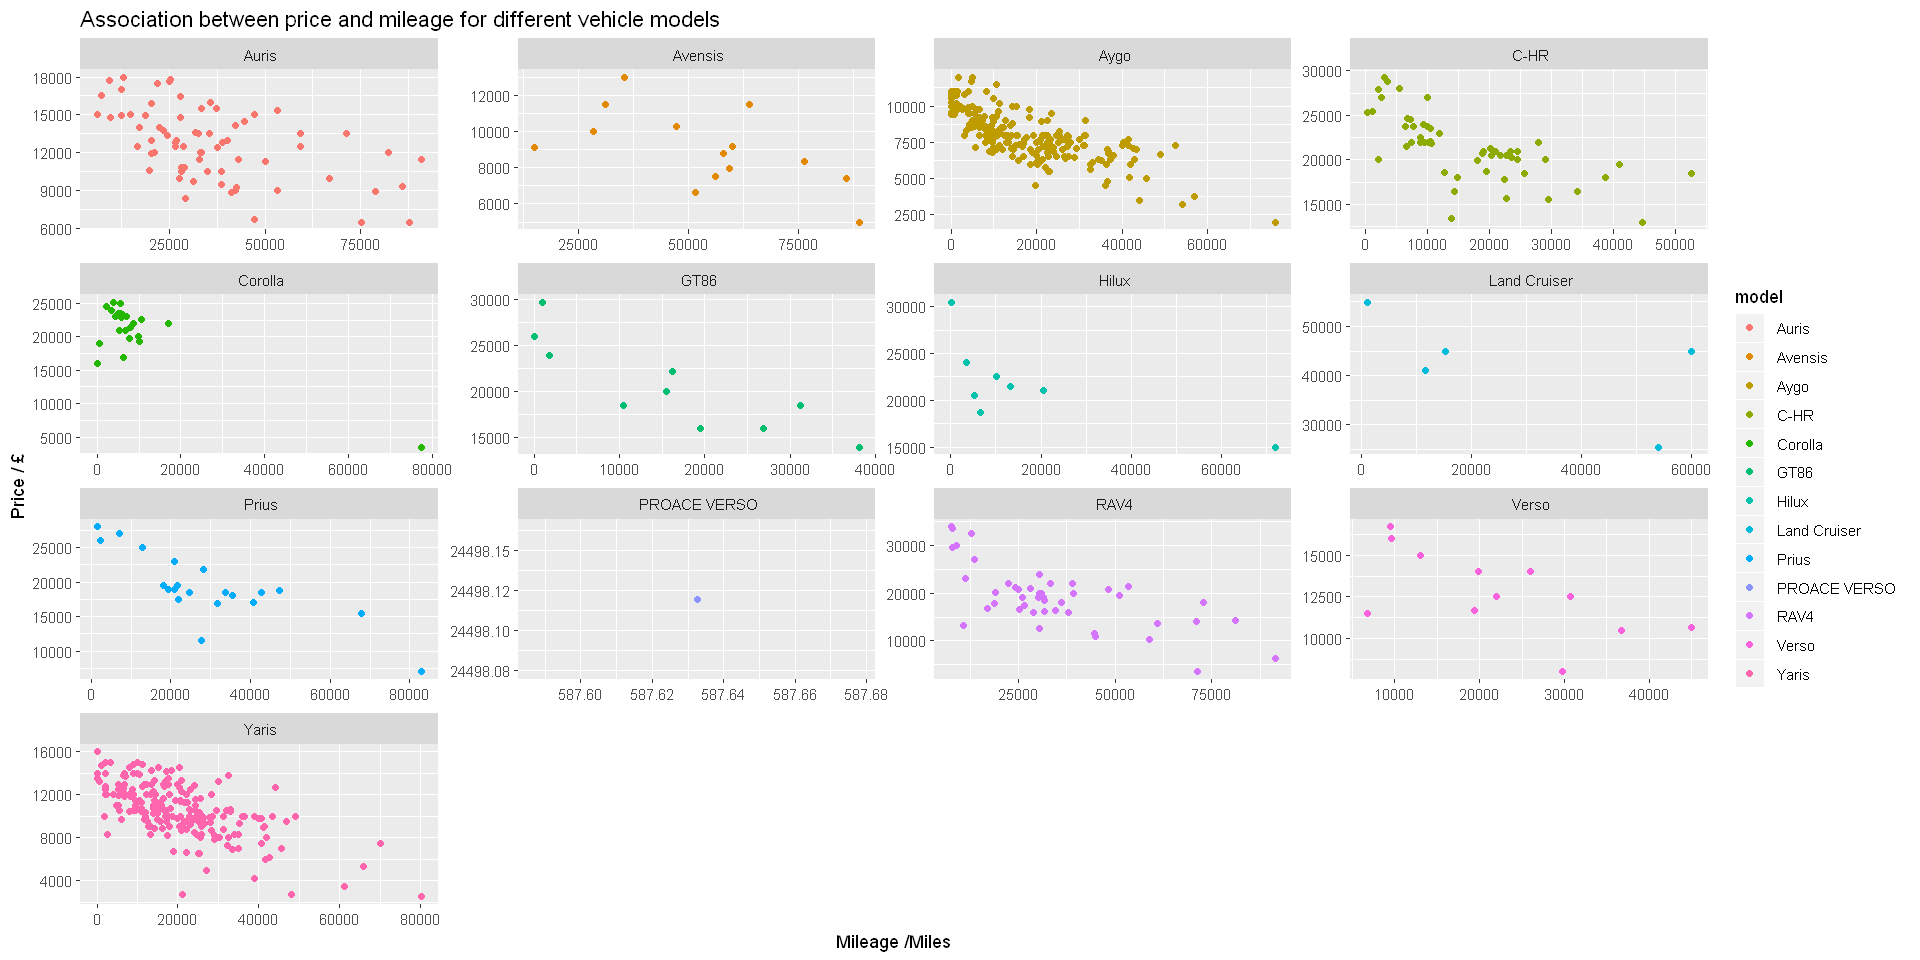

In [54]:
ggplot(toyota_sample, aes(x=mileage, y=price, color=model)) + geom_jitter()+
facet_wrap(~model, scales = "free")+
    labs(x="Mileage /Miles" , y = "Price / £", title="Association between price and mileage for different vehicle models")


This graph allows us to see that for most models there is a linear correlation but for some there appears to be no correlation at all. this is something we can verify by calculating the pmcc for each of them


In [55]:
toyota_sample %>% group_by(model)  %>% summarize(correlation =  cor(price, mileage))

model,correlation
Auris,-0.5368211
Avensis,-0.5914634
Aygo,-0.7501444
C-HR,-0.6840902
Corolla,-0.8170823
GT86,-0.8543157
Hilux,-0.7001511
Land Cruiser,-0.6158114
Prius,-0.8071702
PROACE VERSO,NA


This table shows that in most of the cases there is a significant correlation. It is important to disregard the results for the IQ and PROACE VERSO since there are 1 and 2 datapoints respectivly making the corelation calculated not very meaningful.

### Understanding the effect of vehicles engine size on price  

In [56]:
toyota_sample %>% group_by(model) %>% summarise(`Number of engine sizes` = dim(table(engineSize)))

model,Number of engine sizes
Auris,4
Avensis,4
Aygo,1
C-HR,3
Corolla,4
GT86,1
Hilux,2
Land Cruiser,3
Prius,1
PROACE VERSO,1


In [57]:
dim(table(toyota_sample$engineSize))

[1] 14

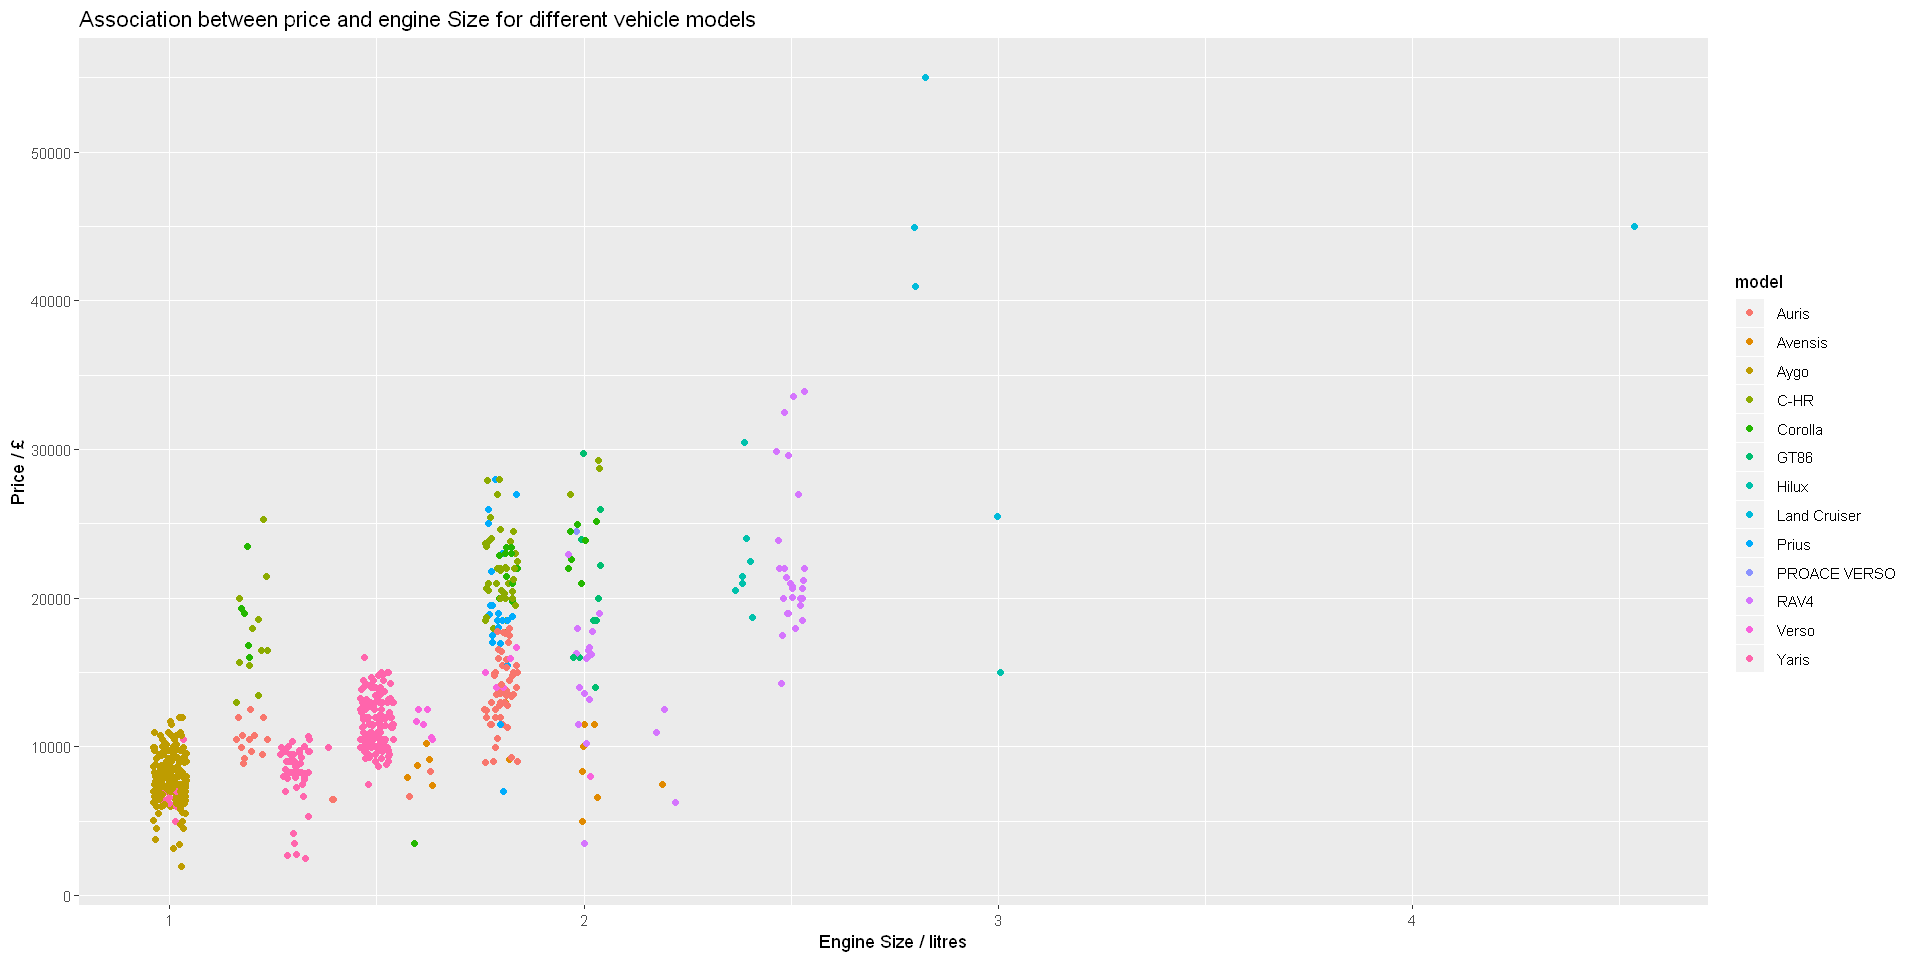

In [58]:
ggplot(toyota_sample, aes(x=engineSize, y=price, color=model)) + geom_jitter()+
# facet_wrap(~model, scales = "free")+
    labs(x="Engine Size / litres" , y = "Price / £", title="Association between price and engine Size for different vehicle models")

### understanding the effect of miles per gallon on price
first lets have a look at the overall trend

Warning message:
"Removed 7 rows containing missing values (geom_point)."

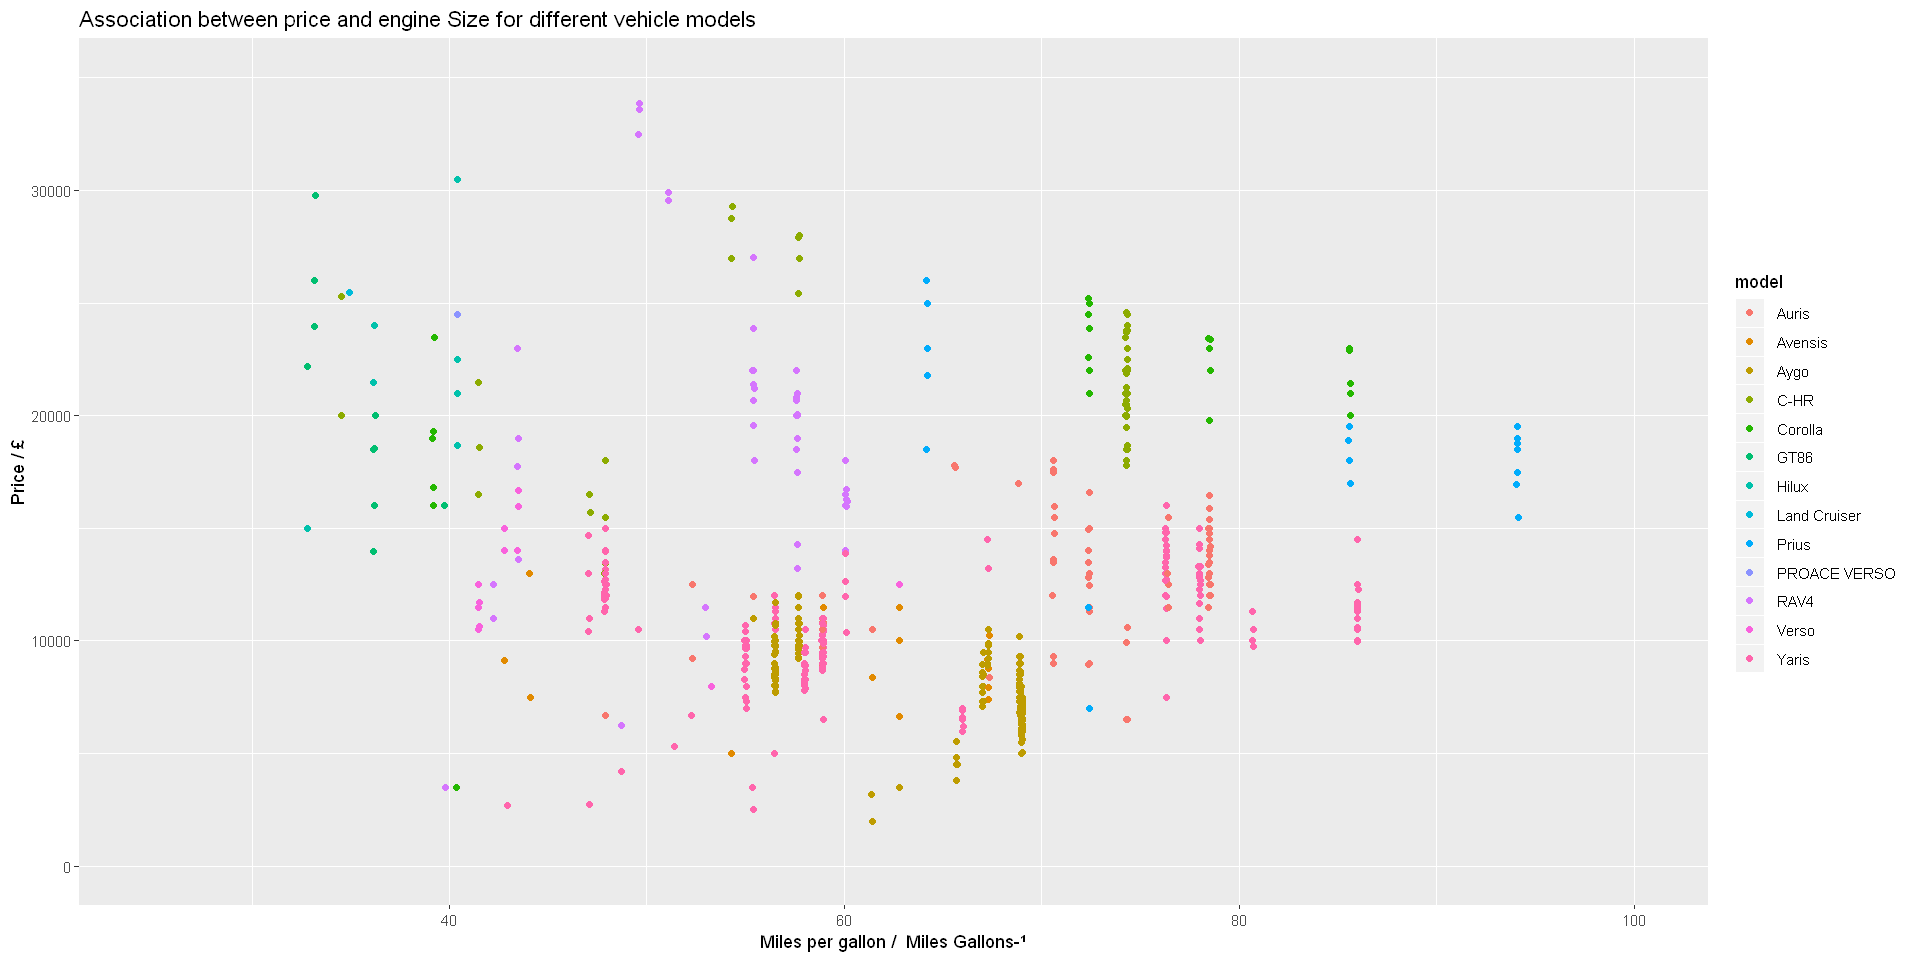

In [60]:
ggplot(toyota_sample, aes(x=mpg, y=price, color=model)) + geom_jitter()+
# facet_wrap(~model, scales = "free")+
    xlim(25,100)+
    ylim(0,35000)+
    labs(x="Miles per gallon /  Miles Gallons-¹" , y = "Price / £", title="Association between price and engine Size for different vehicle models")

This plot apears to show no association between miles per gallon and price

In [73]:
toyota_sample %>% summarise(
    `Number of mpg values` = dim(table(mpg)),  
    `Number of entries` = n(),
    `correlation` =  cor(price, mpg),
    `association` =  cor(price, mpg, method="spearman")
    )

Number of mpg values,Number of entries,correlation,association
59,674,-0.03067392,0.001901059


And when looking at the overall dataset this  appears to be the case too as both the PMCC  and spearmans rank values are tiny

In [59]:
toyota_sample %>% group_by(model) %>% summarise(
    `Number of mpg values` = dim(table(mpg)),  
    `Number of entries` = n(),
    `correlation` =  cor(price, mpg),
    `association` =  cor(price, mpg, method="spearman")
    )

model,Number of mpg values,Number of entries,correlation,association
Auris,13,70,0.37642889,0.312684768
Avensis,7,14,-0.11577425,-0.065562887
Aygo,10,203,-0.58287144,-0.720539068
C-HR,7,53,0.12751332,0.110731799
Corolla,5,23,0.55219537,0.229556405
GT86,4,10,-0.77849837,-0.806405689
Hilux,4,8,0.21953889,0.383107083
Land Cruiser,3,5,-0.86671837,-0.670820393
Prius,6,21,0.47870935,0.003713949
PROACE VERSO,1,1,NA,NA


After splitting up the data by model it appears that there is a weak association in some cases however since there are 13 different models we are sampling from this could expect some spurious correlations. 


### understanding the effect of year on price

Warning message:
"Removed 22 rows containing missing values (geom_point)."

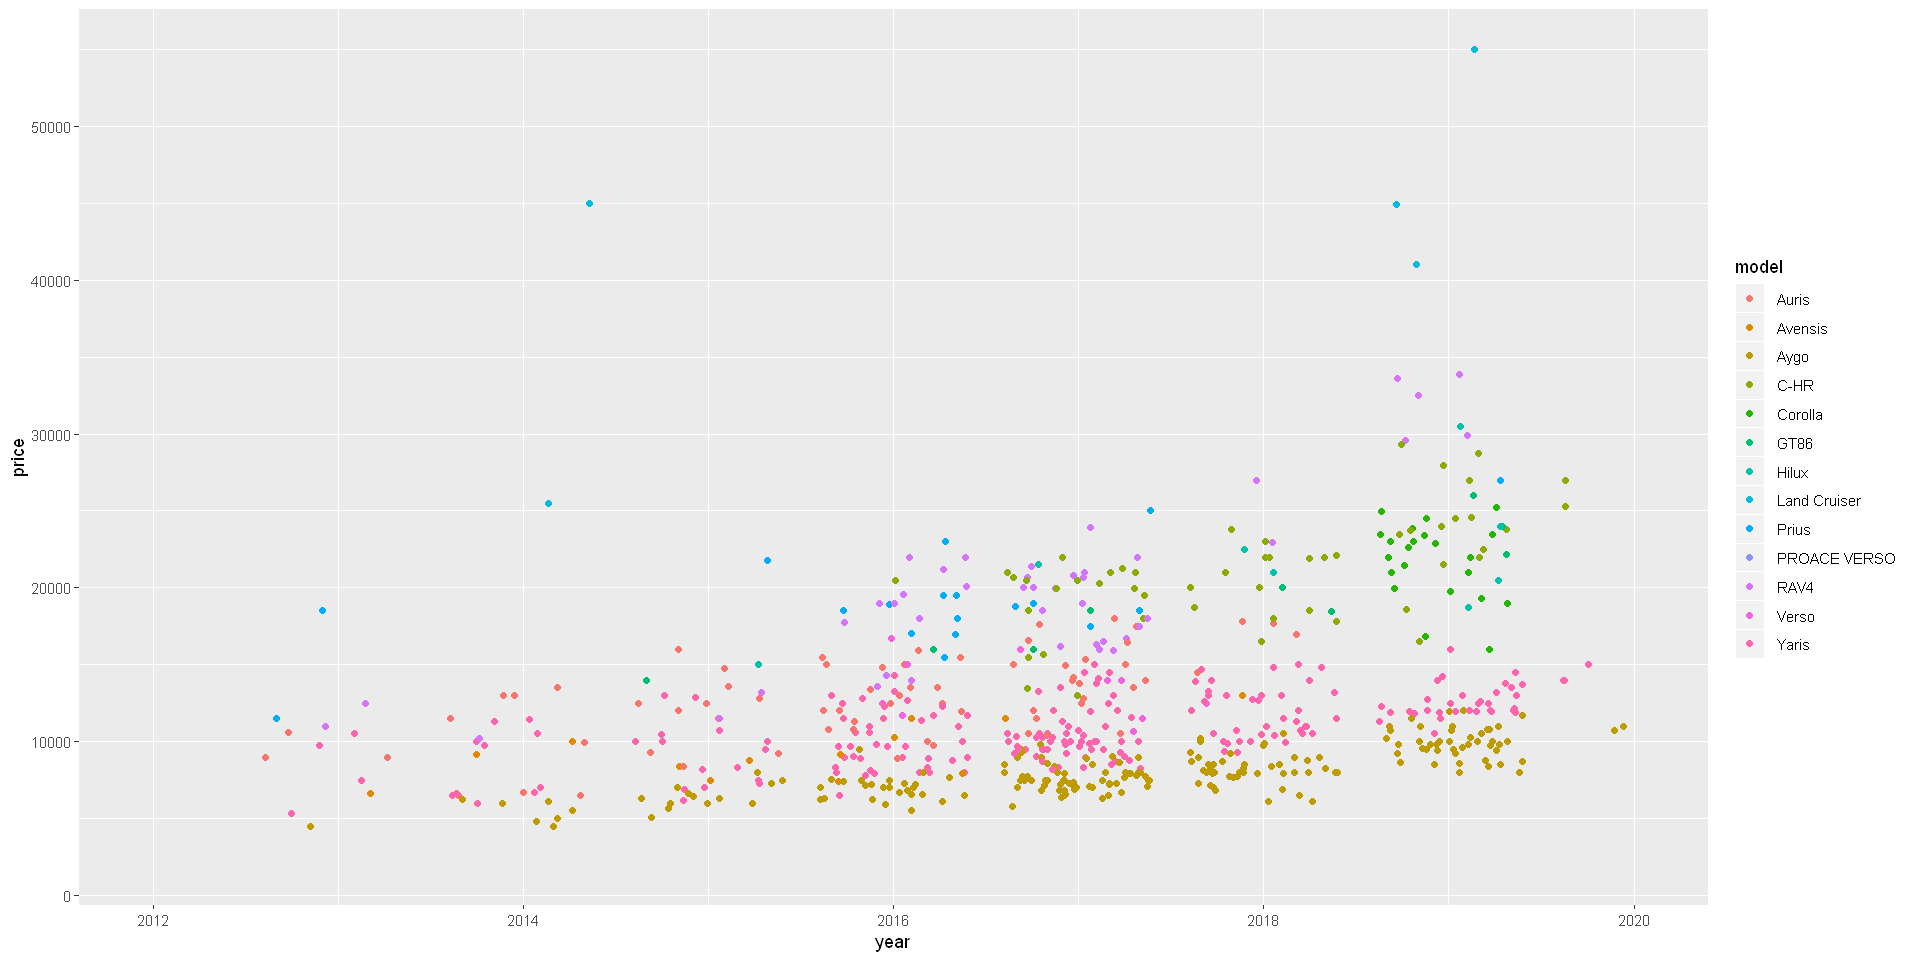

In [75]:

ggplot(toyota_sample, aes(x=year, y=price, color=model)) + geom_jitter() + xlim(2012, 2020)


### understanding the effect of tax on price

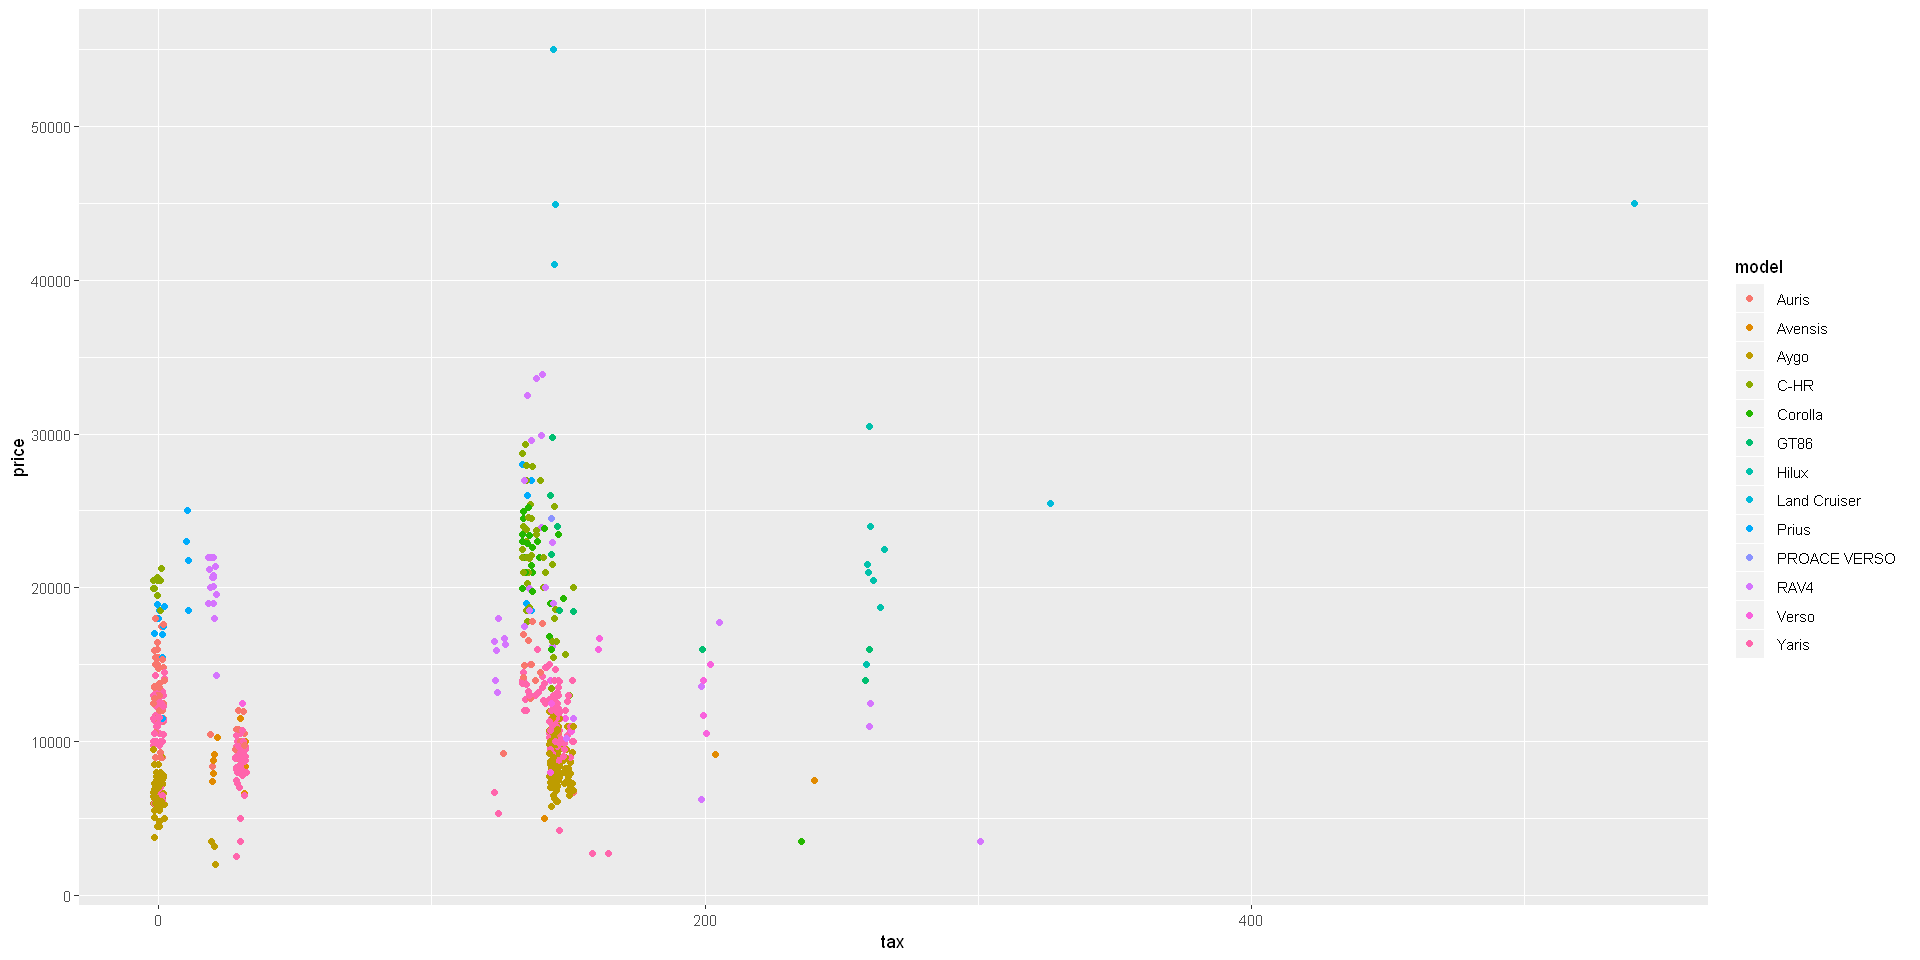

In [80]:
ggplot(toyota_sample, aes(x=tax, y=price, color=model)) + geom_jitter()


In [83]:
toyota_sample %>% group_by(model) %>% summarise(
    `Number of mpg values` = dim(table(tax)),  
    `Number of entries` = n(),
    `correlation` =  cor(tax, price),
    `association` =  cor(tax, price, method="spearman")
    )

model,Number of mpg values,Number of entries,correlation,association
Auris,8,70,0.120840038,-0.06580401
Avensis,6,14,0.008237588,0.08651571
Aygo,4,203,0.582223055,0.50514180
C-HR,5,53,0.145815398,-0.15082084
Corolla,5,23,-0.889929229,-0.46232855
GT86,4,10,-0.708744687,-0.86584798
Hilux,2,8,-0.153899140,-0.12598816
Land Cruiser,3,5,-0.260430887,-0.11180340
Prius,3,21,0.543062572,0.69071410
PROACE VERSO,1,1,NA,NA


### EDA summary 
car model appears to be the greatest predictor of price. Factors such as milage and year registered and engine size may also be useful variables


## Model Creation
In this section we will create some models to predict prices and then evaluate them

Lets start with a simple linear model:

In [92]:
model_sample = sample.split(toyota_data$price, SplitRatio = .75)
train_sample = subset(toyota_data, model_sample == TRUE)
test_sample  = subset(toyota_data, model_sample == FALSE)

In [112]:
simple_model <- lm(price ~ model + mileage +0, data=train_sample )

In [141]:
glance(simple_model)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.9667988,0.9666834,2607.755,8377.184,0,19,-50919.71,101879.4,102011.6,37170901836,5466


In [114]:
simple_model.summary <- augment(simple_model)


In [115]:
# simple_model.summary

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.9667988,0.9666834,2607.755,8377.184,0,19,-50919.71,101879.4,102011.6,37170901836,5466


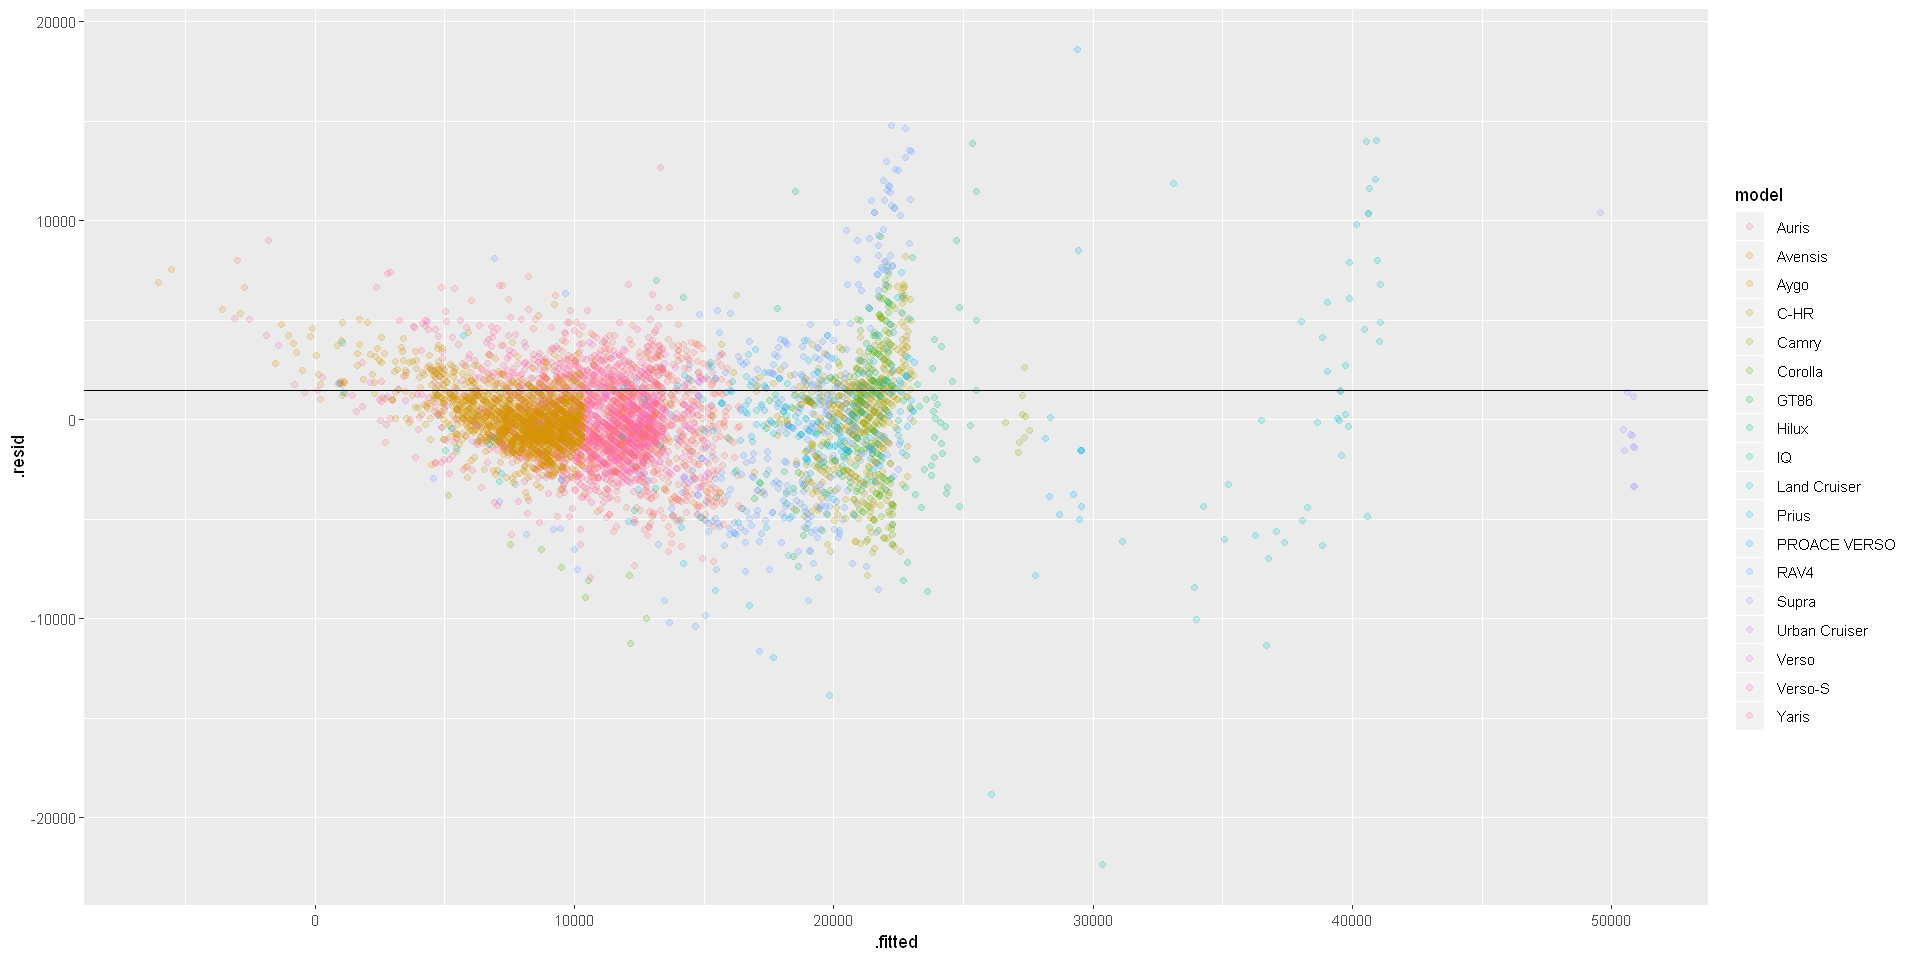

In [293]:

ggplot( augment(simple_model), aes(x = .fitted, y = .resid, color=model)) + geom_point(alpha=.2)+
geom_hline(yintercept=1500)
glance(simple_model)


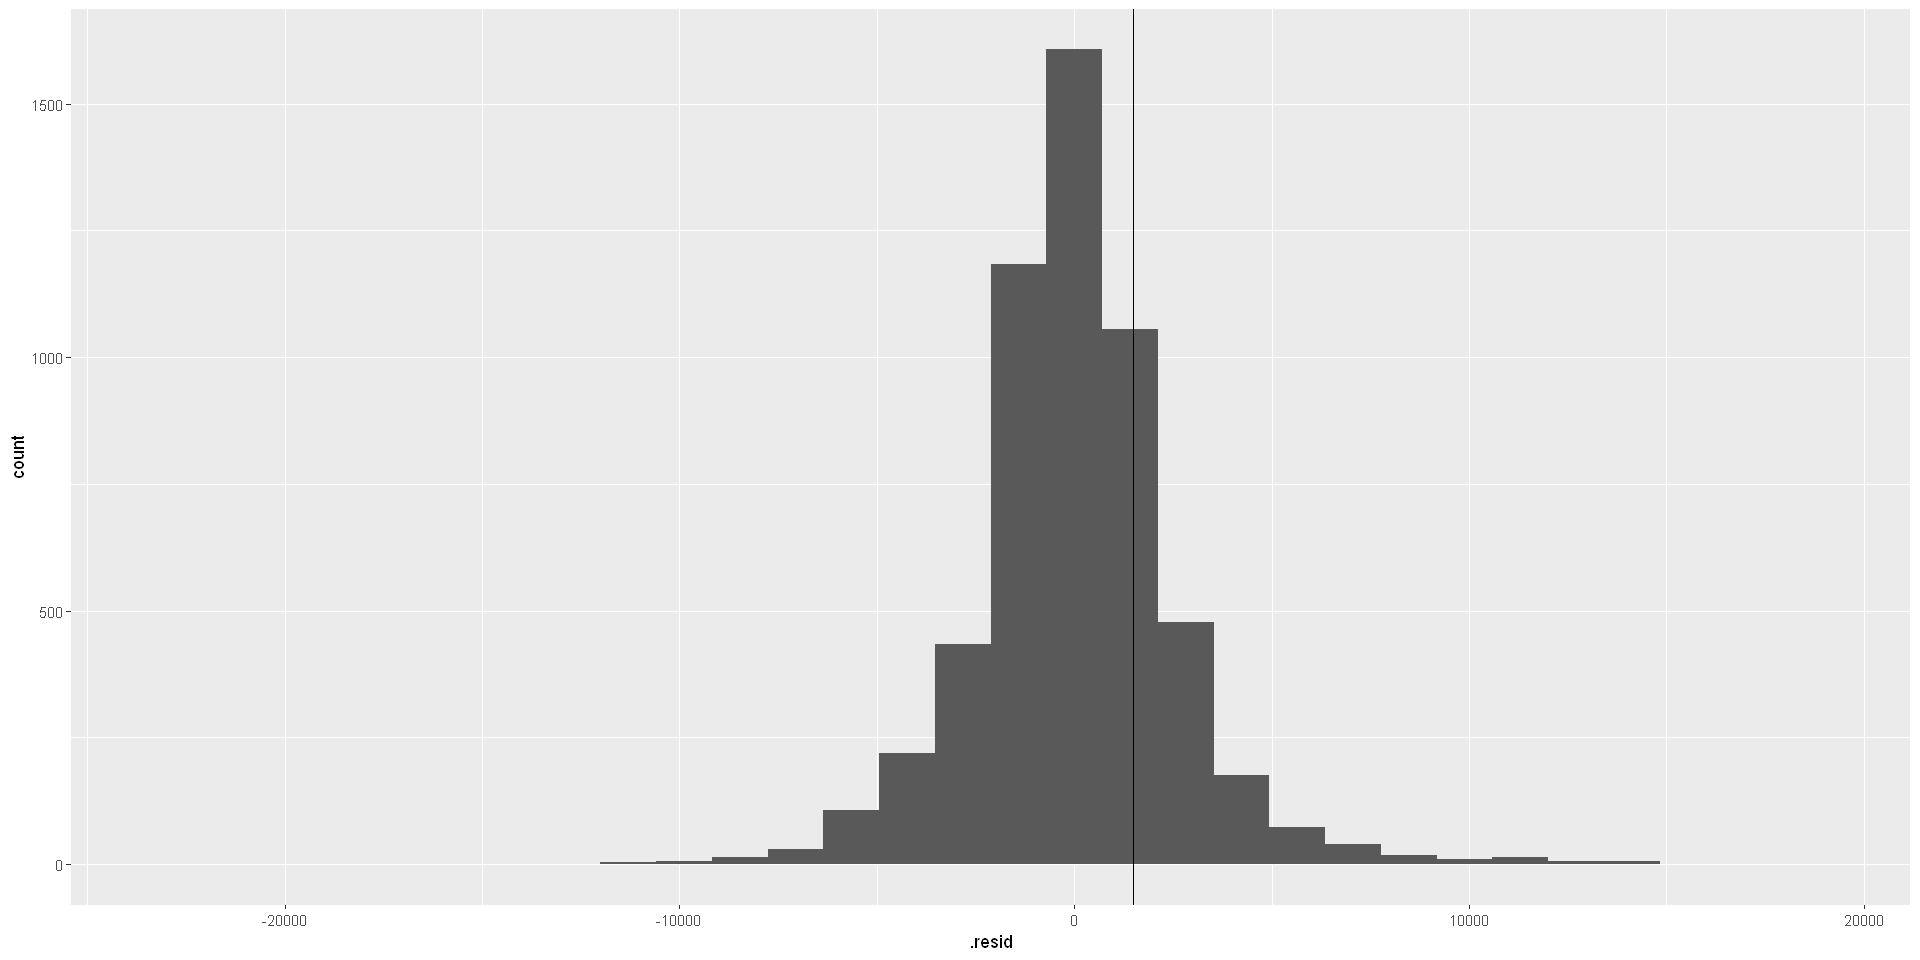

In [142]:
ggplot( augment(simple_model), aes(x =   .resid)) + geom_histogram(bins=30)+
geom_vline(xintercept=1500)

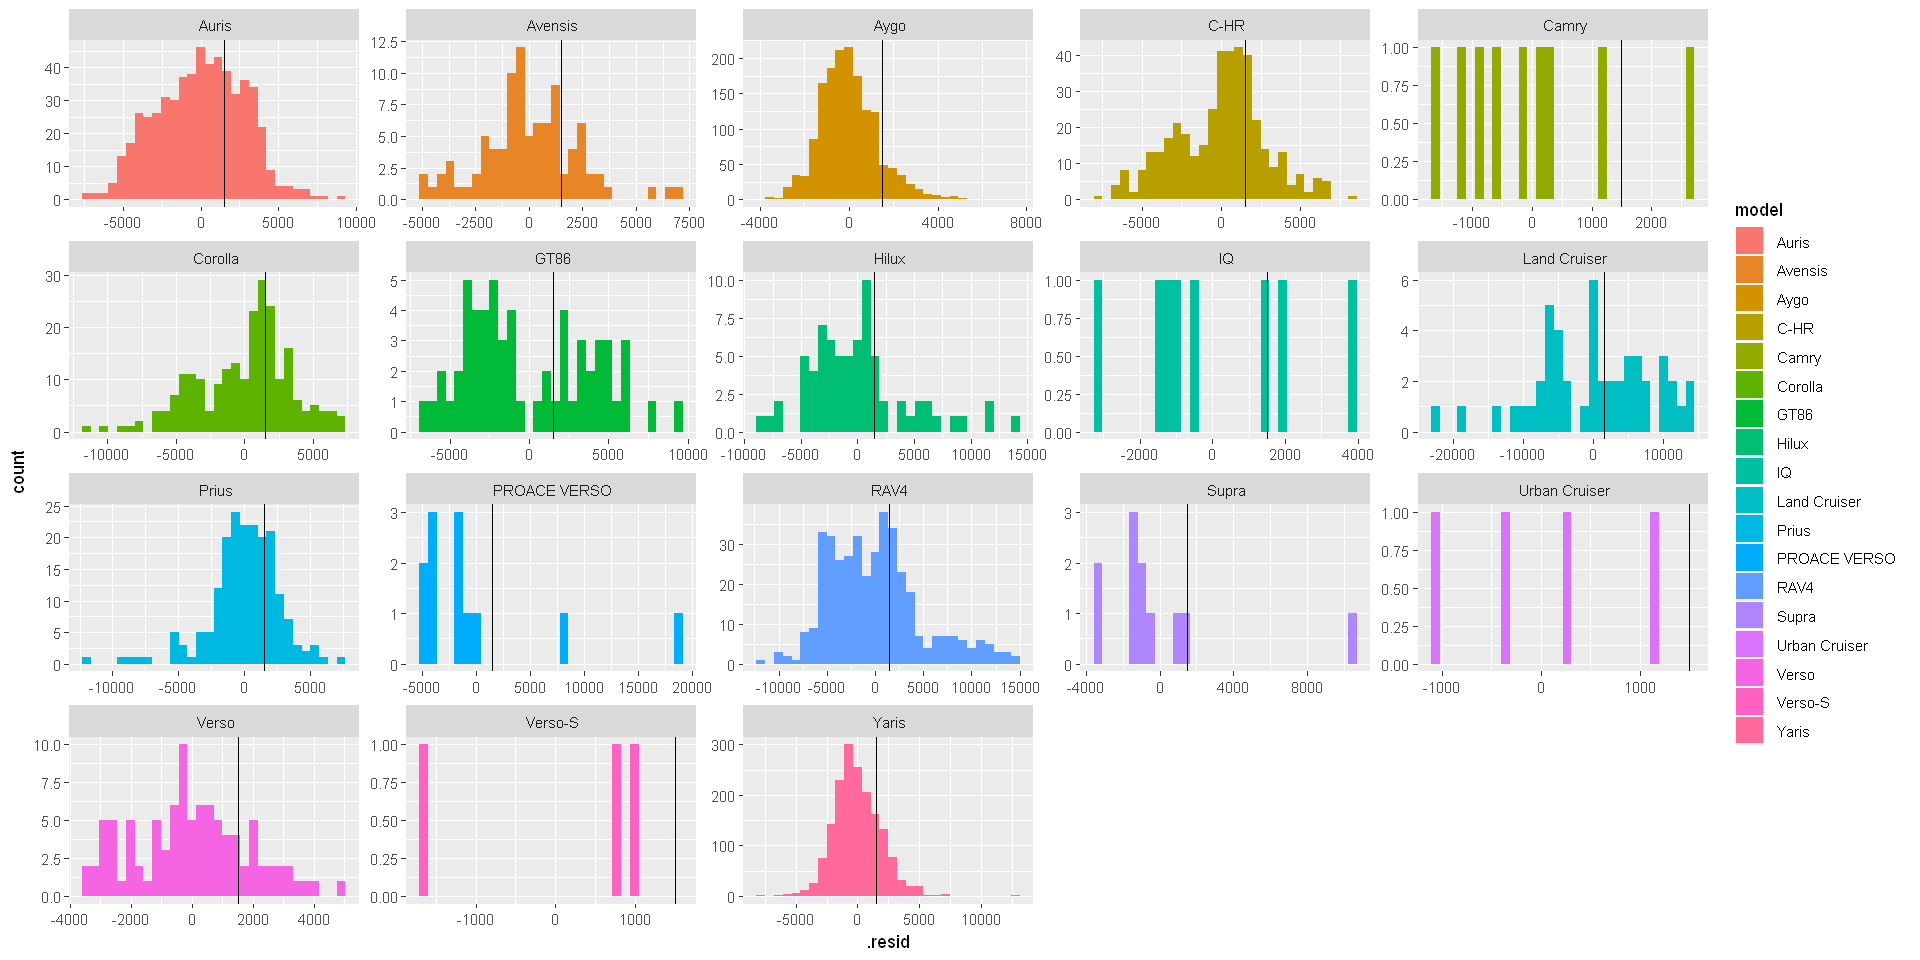

In [145]:
ggplot( augment(simple_model), aes(x =   .resid, fill=model)) + geom_histogram(bins=30)+
geom_vline(xintercept=1500)+facet_wrap(~model, scales = "free")

In [140]:
tidy(simple_model)

term,estimate,std.error,statistic,p.value
model Auris,16925.1865346,1.267011e+02,133.583530,0.000000e+00
model Avensis,16114.3158070,2.867925e+02,56.188074,0.000000e+00
model Aygo,10269.2893488,7.514956e+01,136.651356,0.000000e+00
model C-HR,23105.3191214,1.342661e+02,172.086009,0.000000e+00
model Camry,27942.6157372,8.693179e+02,32.143150,8.714812e-208
model Corolla,22247.8624451,1.733832e+02,128.316117,0.000000e+00
model GT86,22203.8934552,3.412338e+02,65.069451,0.000000e+00
model Hilux,25514.6626280,3.125799e+02,81.626045,0.000000e+00
model IQ,10718.4448195,9.270622e+02,11.561732,1.456603e-30
model Land Cruiser,41069.5143116,3.803332e+02,107.982996,0.000000e+00


n
0.7773344


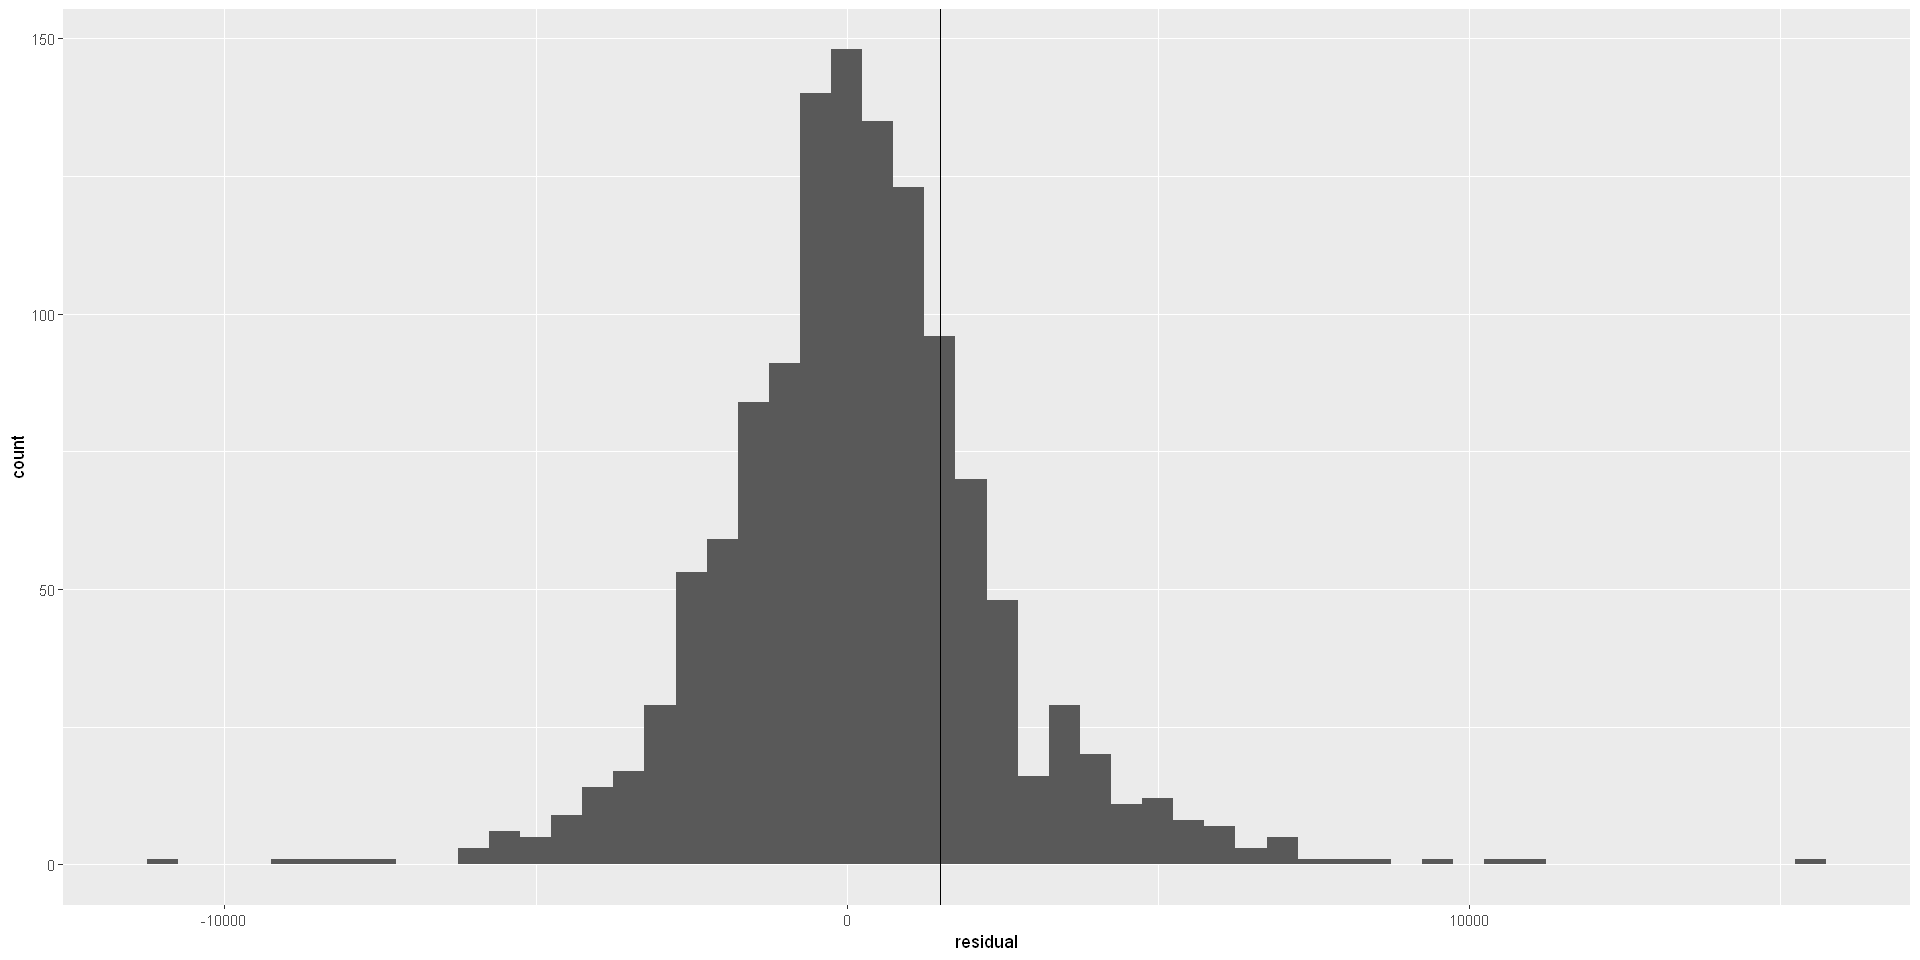

In [175]:
first_test_results <- test_sample %>% mutate(
    predicted = predict(simple_model, test_sample),
    residual = predicted-price
    
)
ggplot( first_test_results, aes(x =   residual)) + geom_histogram(binwidth=500)+
geom_vline(xintercept=1500)
first_test_results %>% filter(residual <1500) %>% count()/first_test_results%>% count()

Even without testing the performance on the test set it is apparent that it does not perform well as lots of the residiuals are very hight and a lot of data falls utside the £1500 prediction limit

term,estimate,std.error,statistic,p.value
model Auris,-1.486998e+06,3.353778e+04,-44.33801,0.000000e+00
model Avensis,-1.485399e+06,3.354098e+04,-44.28610,0.000000e+00
model Aygo,-1.489980e+06,3.354939e+04,-44.41153,0.000000e+00
model C-HR,-1.481483e+06,3.355214e+04,-44.15466,0.000000e+00
model Camry,-1.479839e+06,3.355029e+04,-44.10809,0.000000e+00
model Corolla,-1.482256e+06,3.355309e+04,-44.17642,0.000000e+00
model GT86,-1.480974e+06,3.353889e+04,-44.15691,0.000000e+00
model Hilux,-1.477679e+06,3.354635e+04,-44.04886,0.000000e+00
model IQ,-1.487169e+06,3.349524e+04,-44.39942,0.000000e+00
model Land Cruiser,-1.462400e+06,3.351870e+04,-43.62937,0.000000e+00


r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual
0.9841379,0.9840682,1803.303,14117.46,0,24,-48893.95,97837.91,98003.15,17758630560,5461


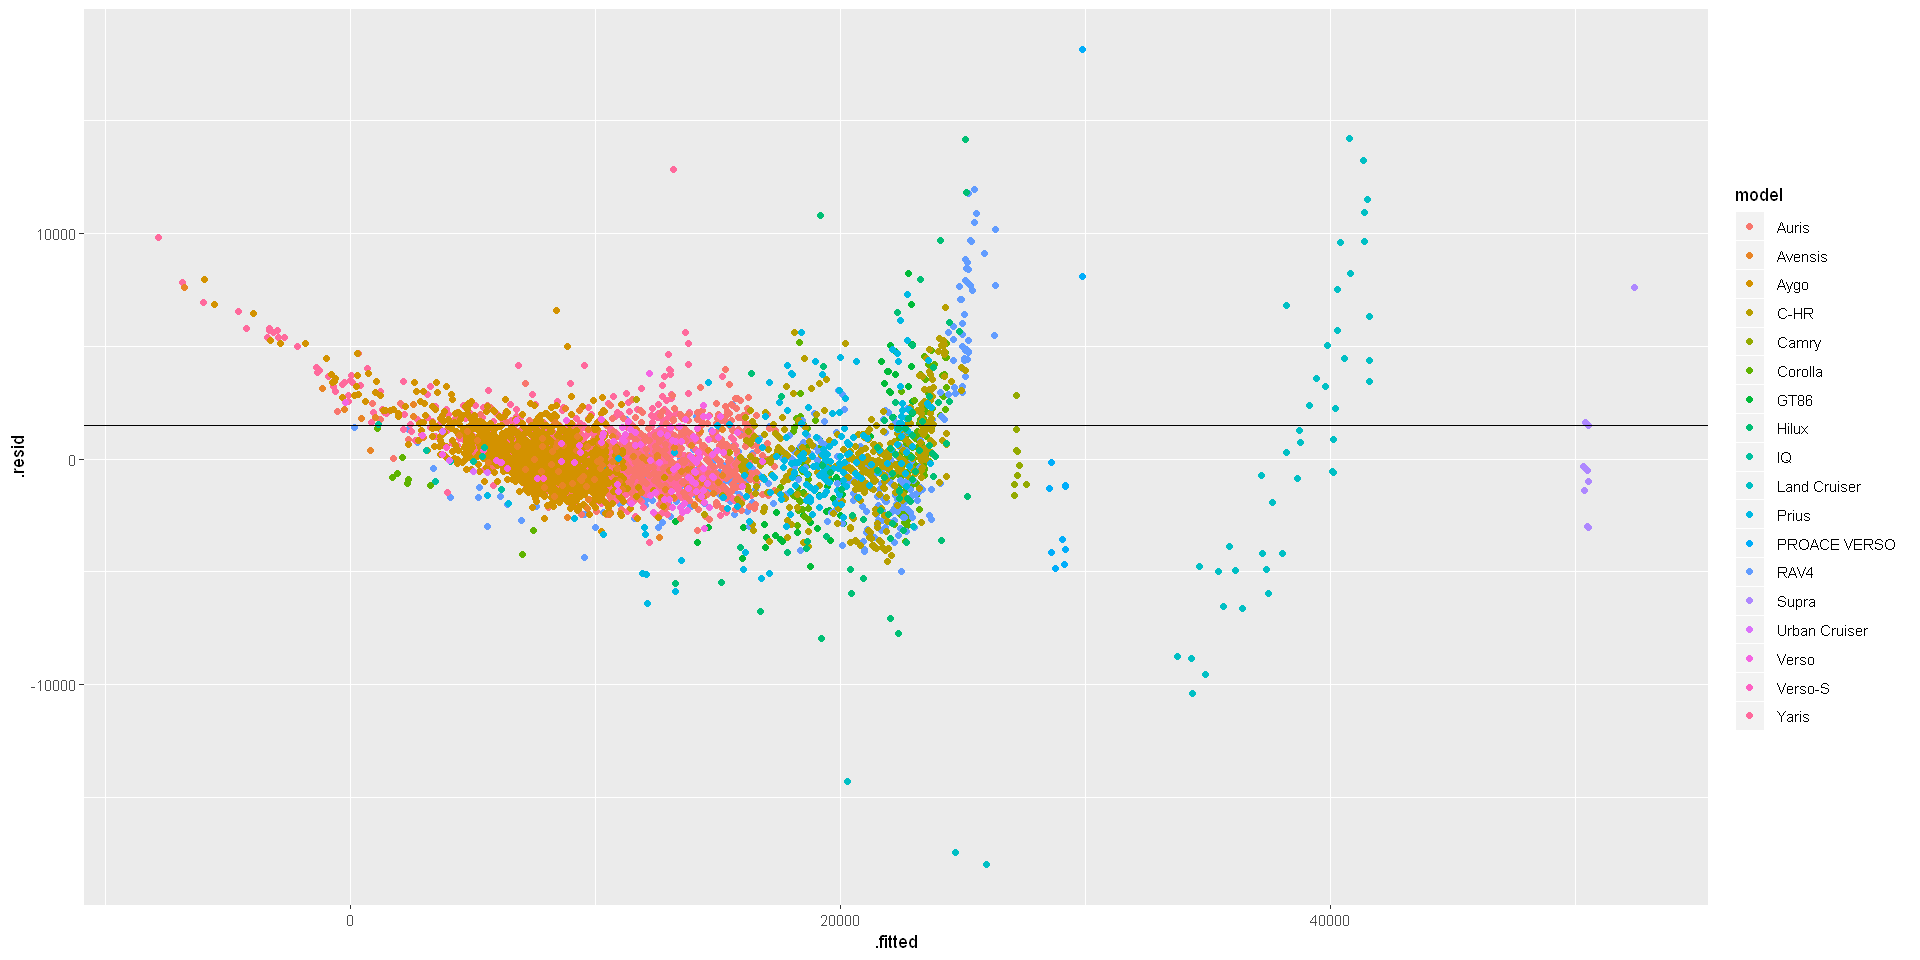

In [207]:
second_model <- lm(price ~ model + mileage +engineSize +year+fuelType+0, data=train_sample )
tidy(second_model)
ggplot( augment(second_model), aes(x = .fitted, y = .resid, color=model)) + geom_point()+
geom_hline(yintercept=1500)
glance(second_model)


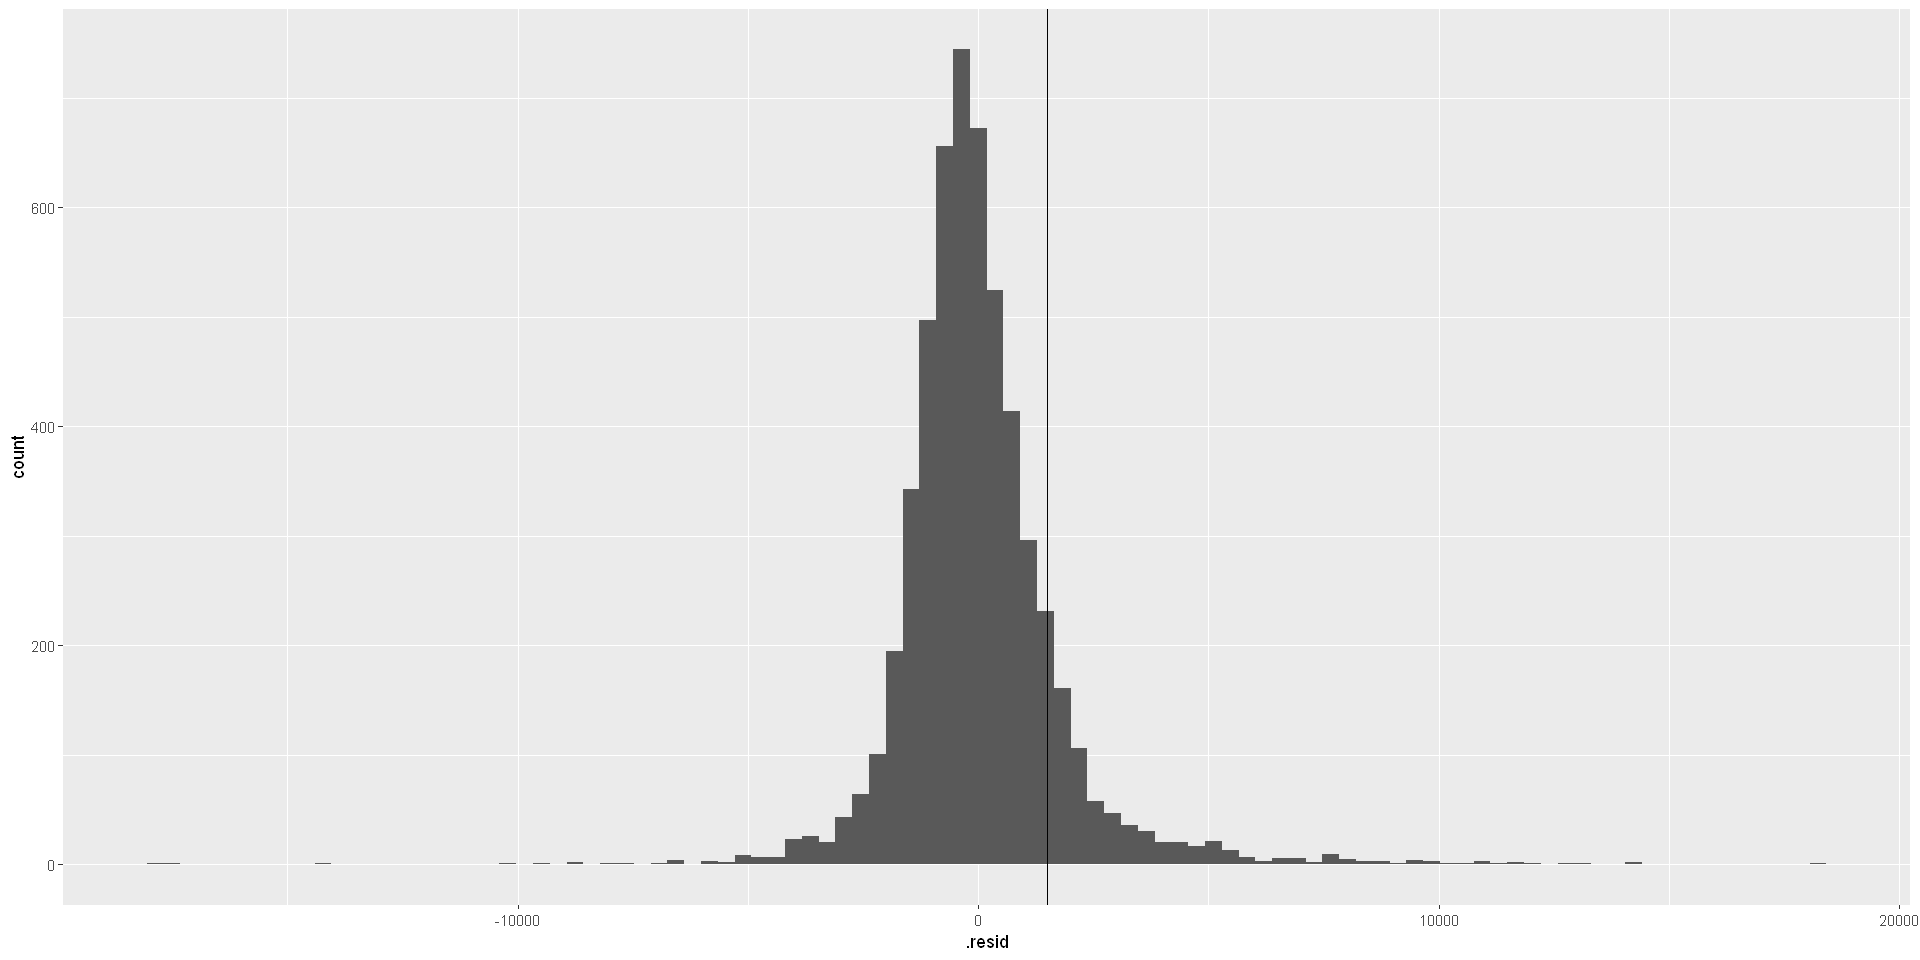

In [208]:
ggplot( augment(second_model), aes(x =   .resid)) + geom_histogram(bins=100)+
geom_vline(xintercept=1500)

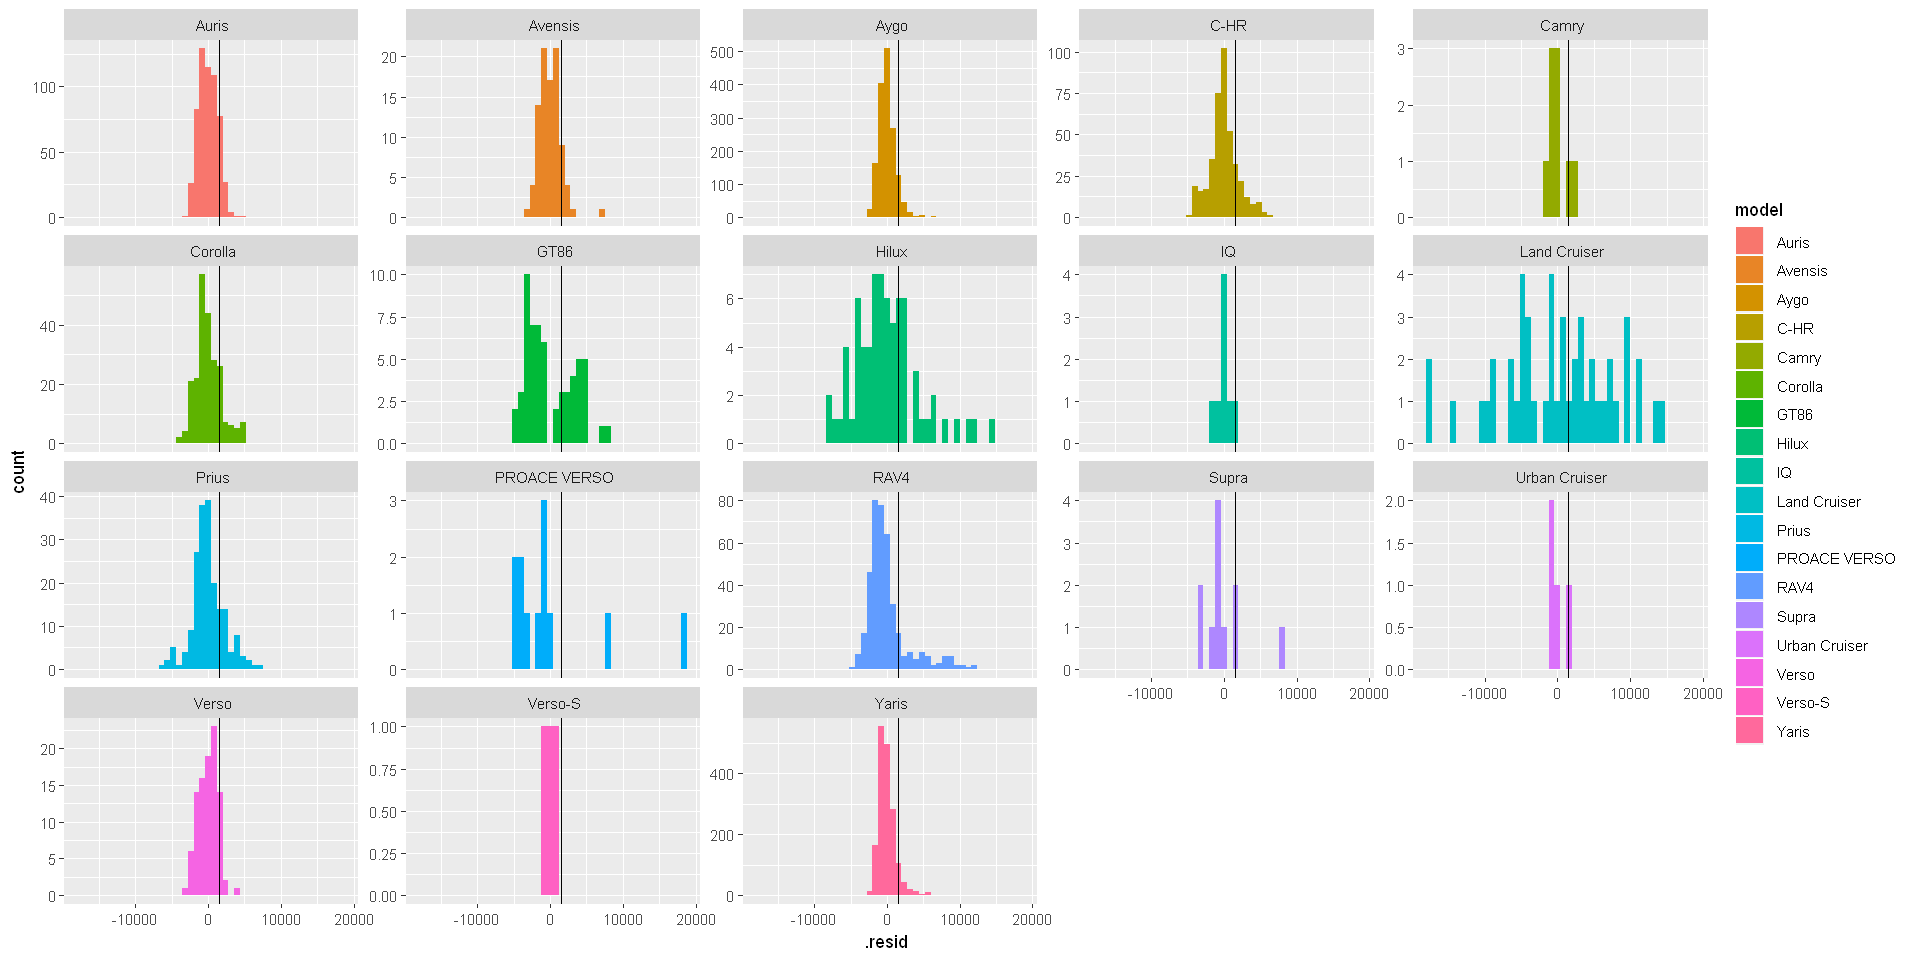

In [209]:
ggplot( augment(second_model), aes(x =   .resid, fill=model)) + geom_histogram(binwidth=800)+
geom_vline(xintercept=1500)+facet_wrap(~model, scales = "free_y")

In [210]:
second_test_results <- test_sample %>% mutate(
    predicted = predict(second_model, test_sample),
    residual = predicted-price
    
)

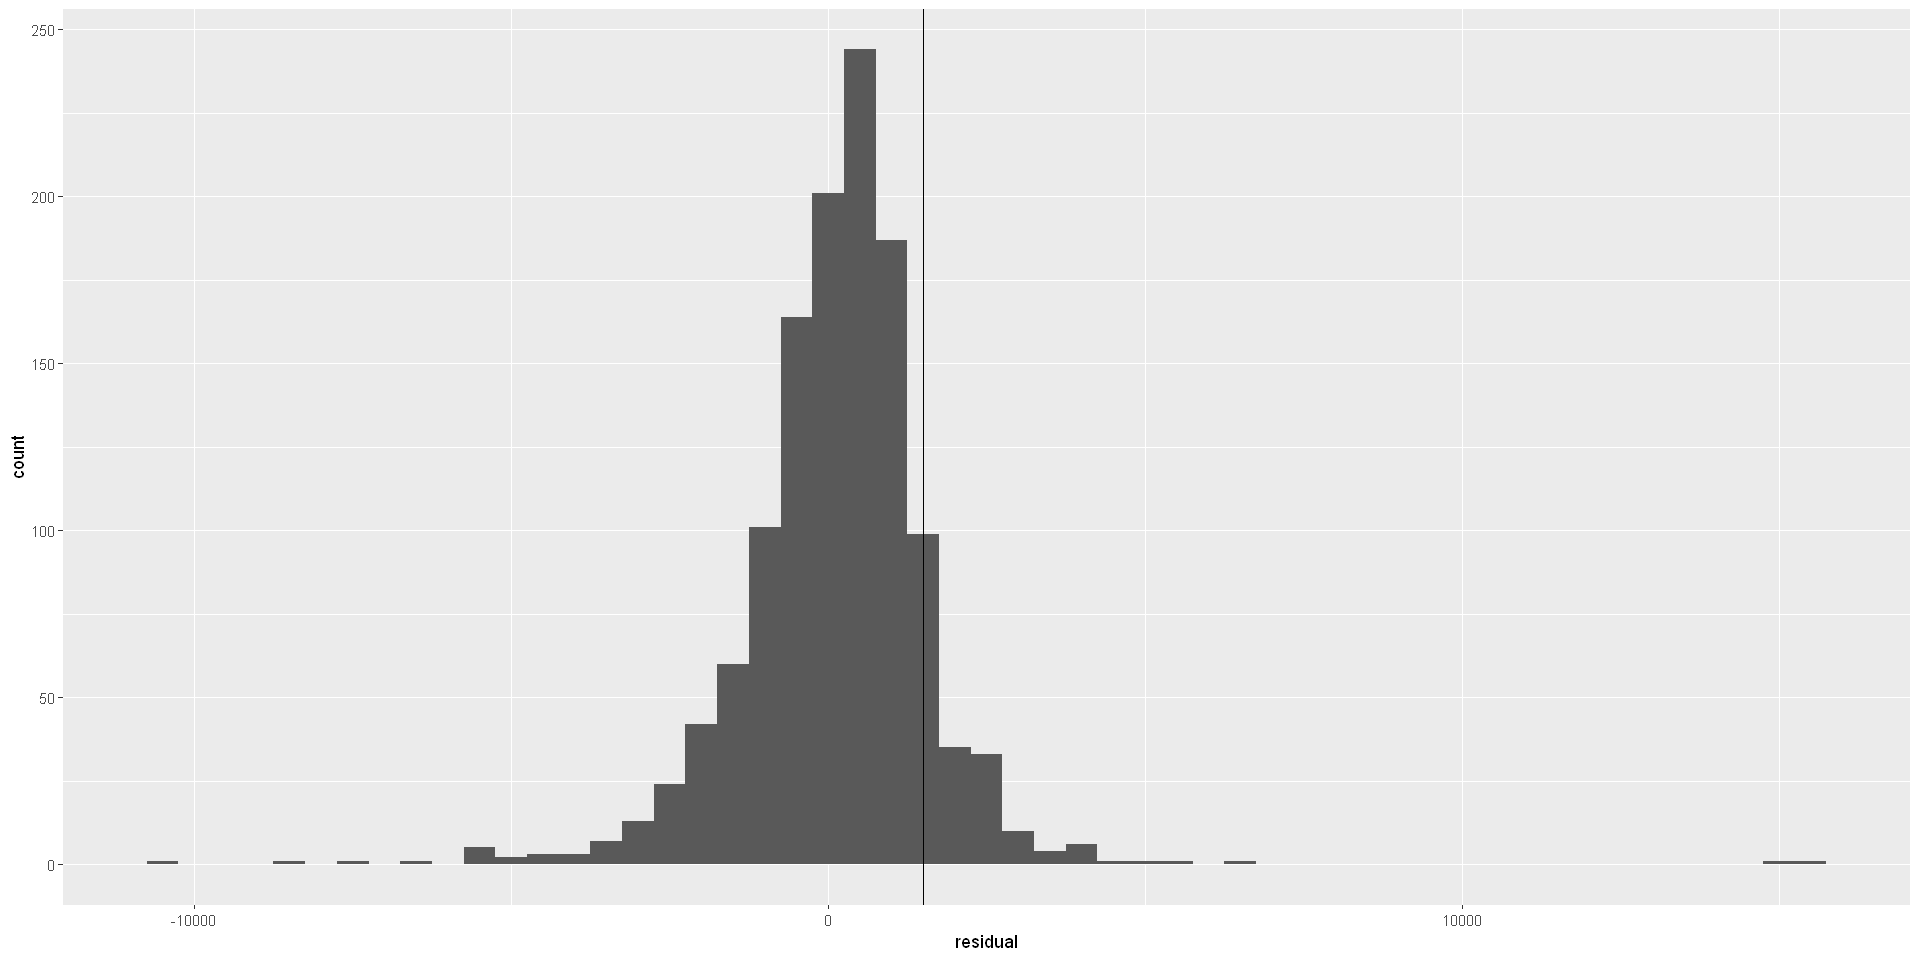

In [211]:
ggplot( second_test_results, aes(x =   residual)) + geom_histogram(binwidth=500)+
geom_vline(xintercept=1500)

In [212]:
second_test_results %>% filter(residual <1500) %>% count()/second_test_results%>% count()

n
0.8938547


In [213]:
'%ni%' <- Negate('%in%')


In [214]:
7 %ni% c(7,8,9)

[1] FALSE

In [186]:
second_test_results %>% filter(residual <1500 & as.integer(model) %ni% c(7,13,9)) %>% count()/second_test_results %>% filter(
    as.integer(model) %ni% c(7,13,9))%>% count()


n
0.9106529


In [180]:
second_test_results %>% filter(
    model==1)

model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,predicted,residual


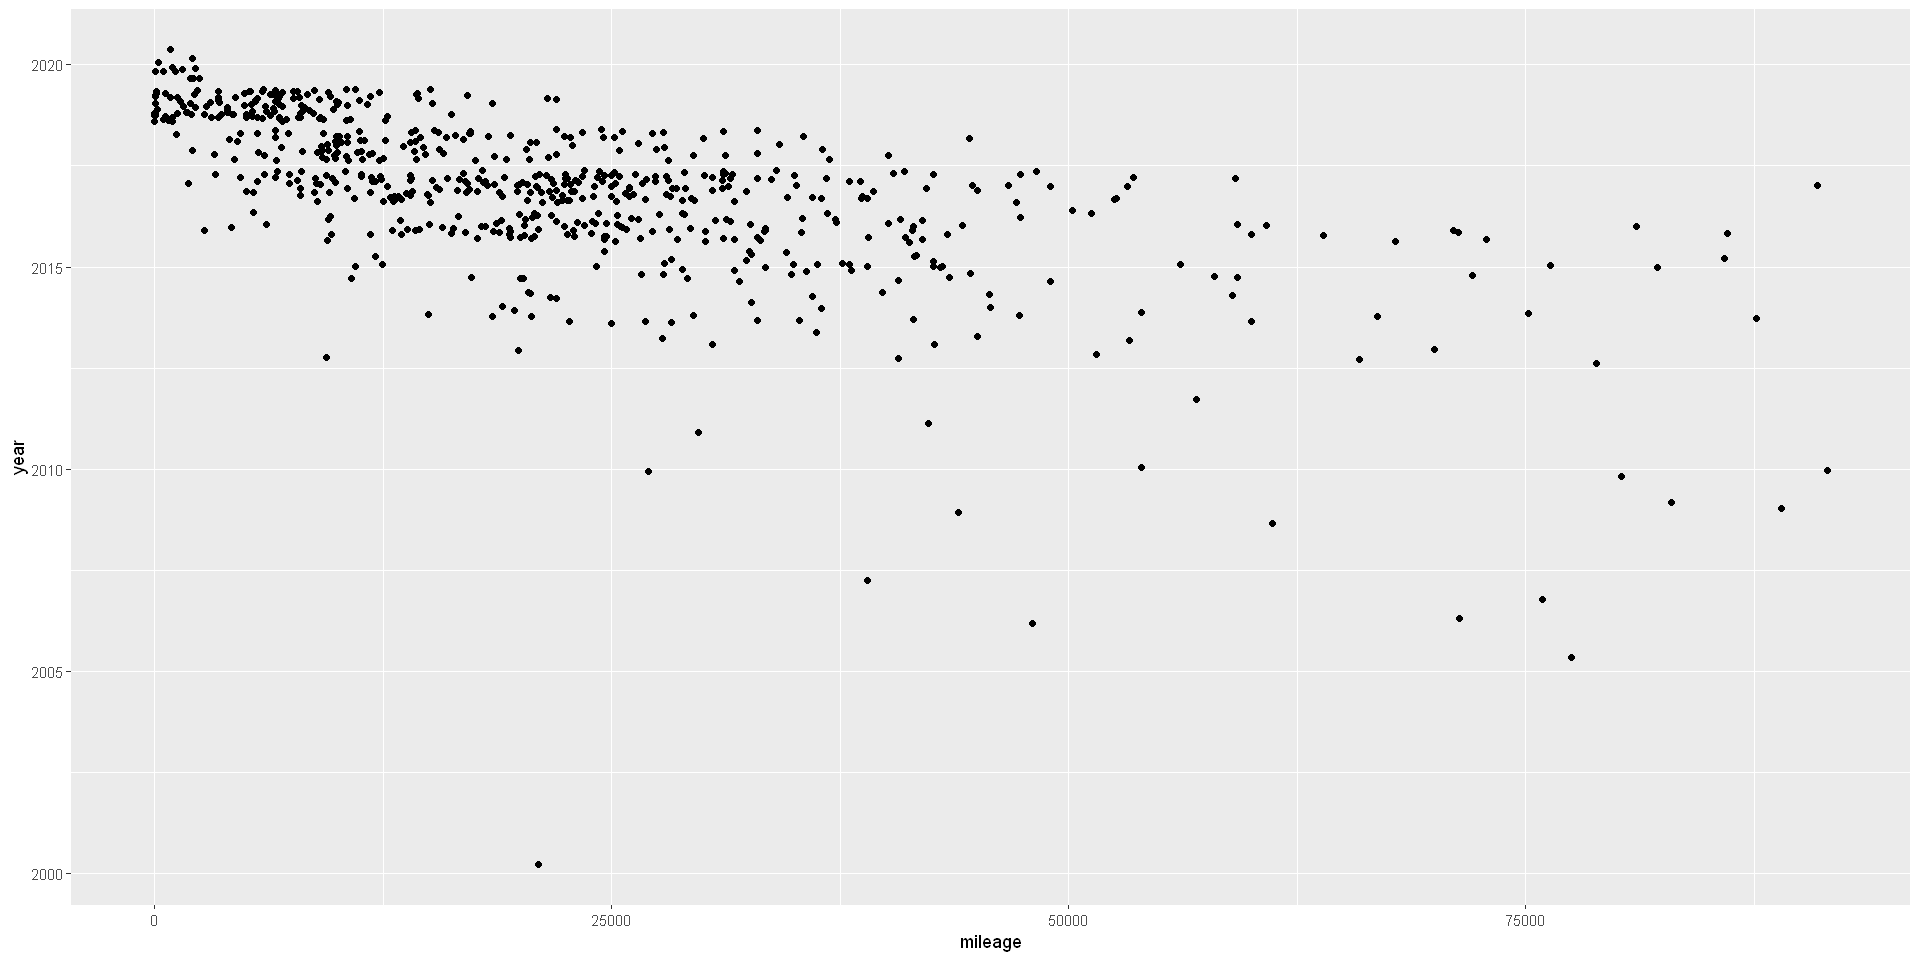

In [61]:
ggplot(toyota_sample, aes(x=mileage, y=year)) + geom_jitter()

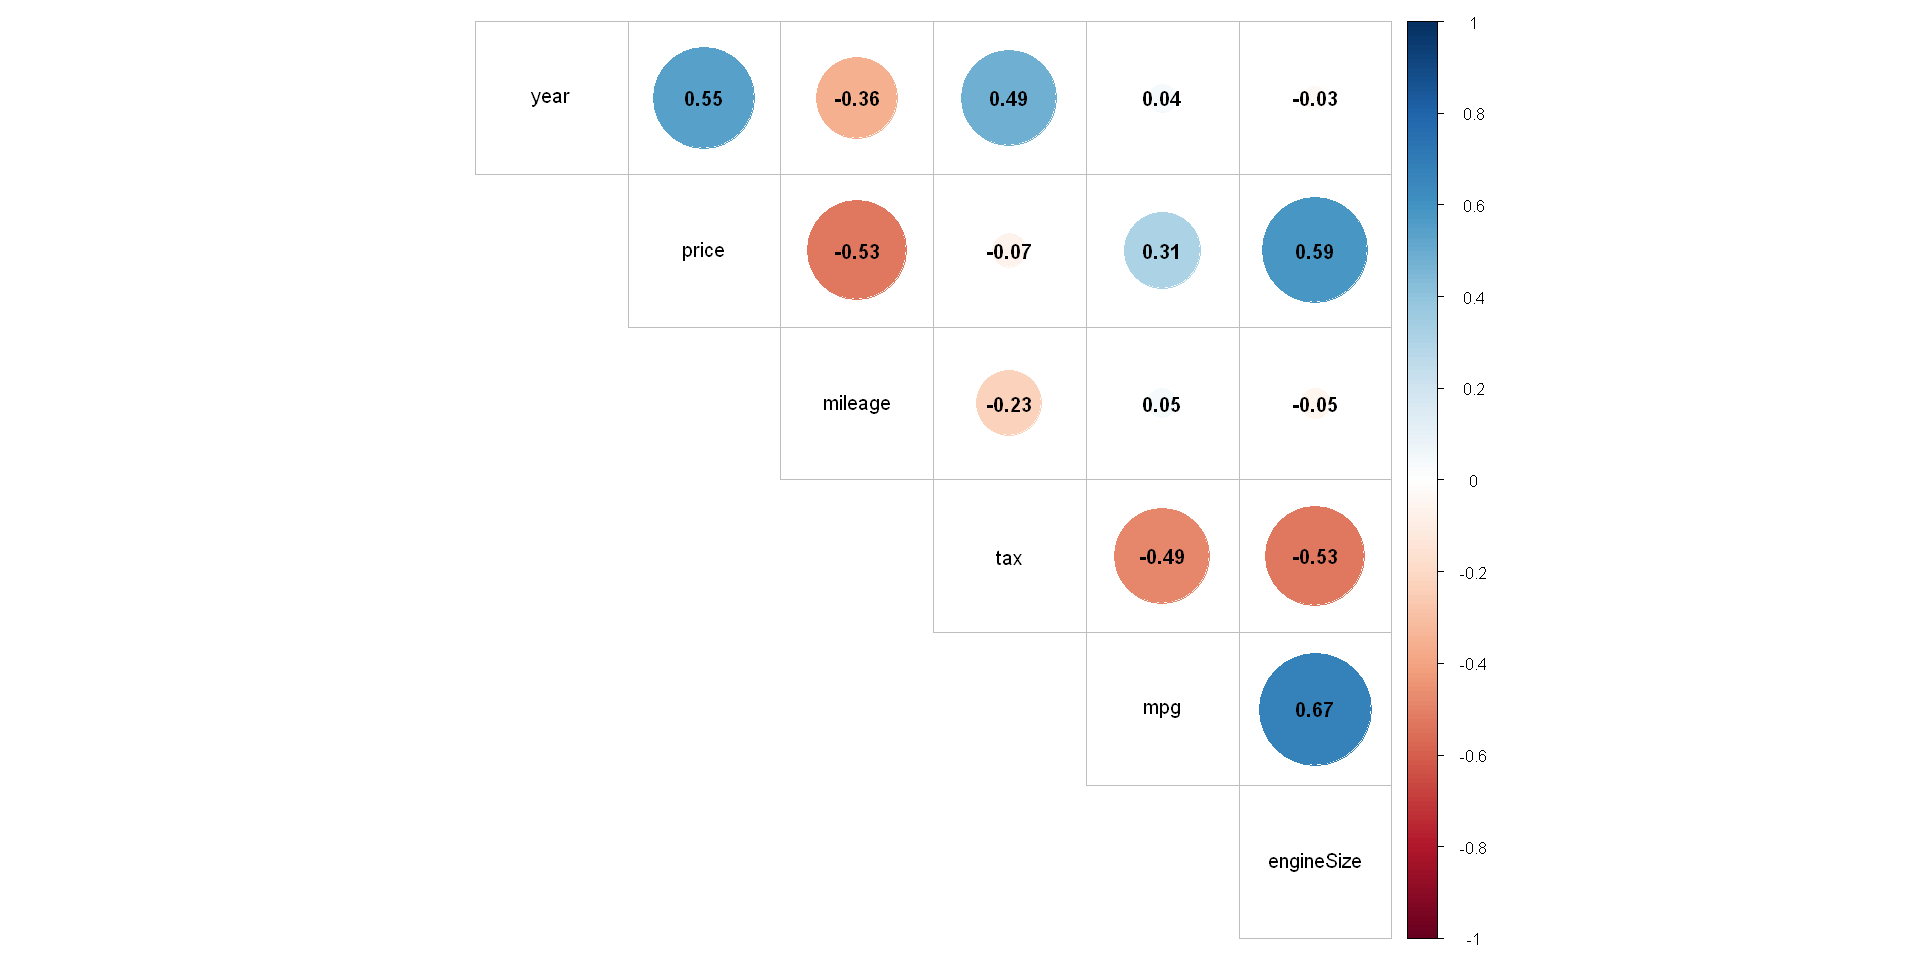

In [62]:
correlation_matrix <- cor(dplyr::select_if(toyota_sample %>% filter(as.integer(model) == 1), is.numeric), method = c( "spearman"))
corrplot(correlation_matrix, type = "upper", 
         tl.col = "black", tl.srt = 45,  addCoef.col = 'black', tl.pos = 'd')

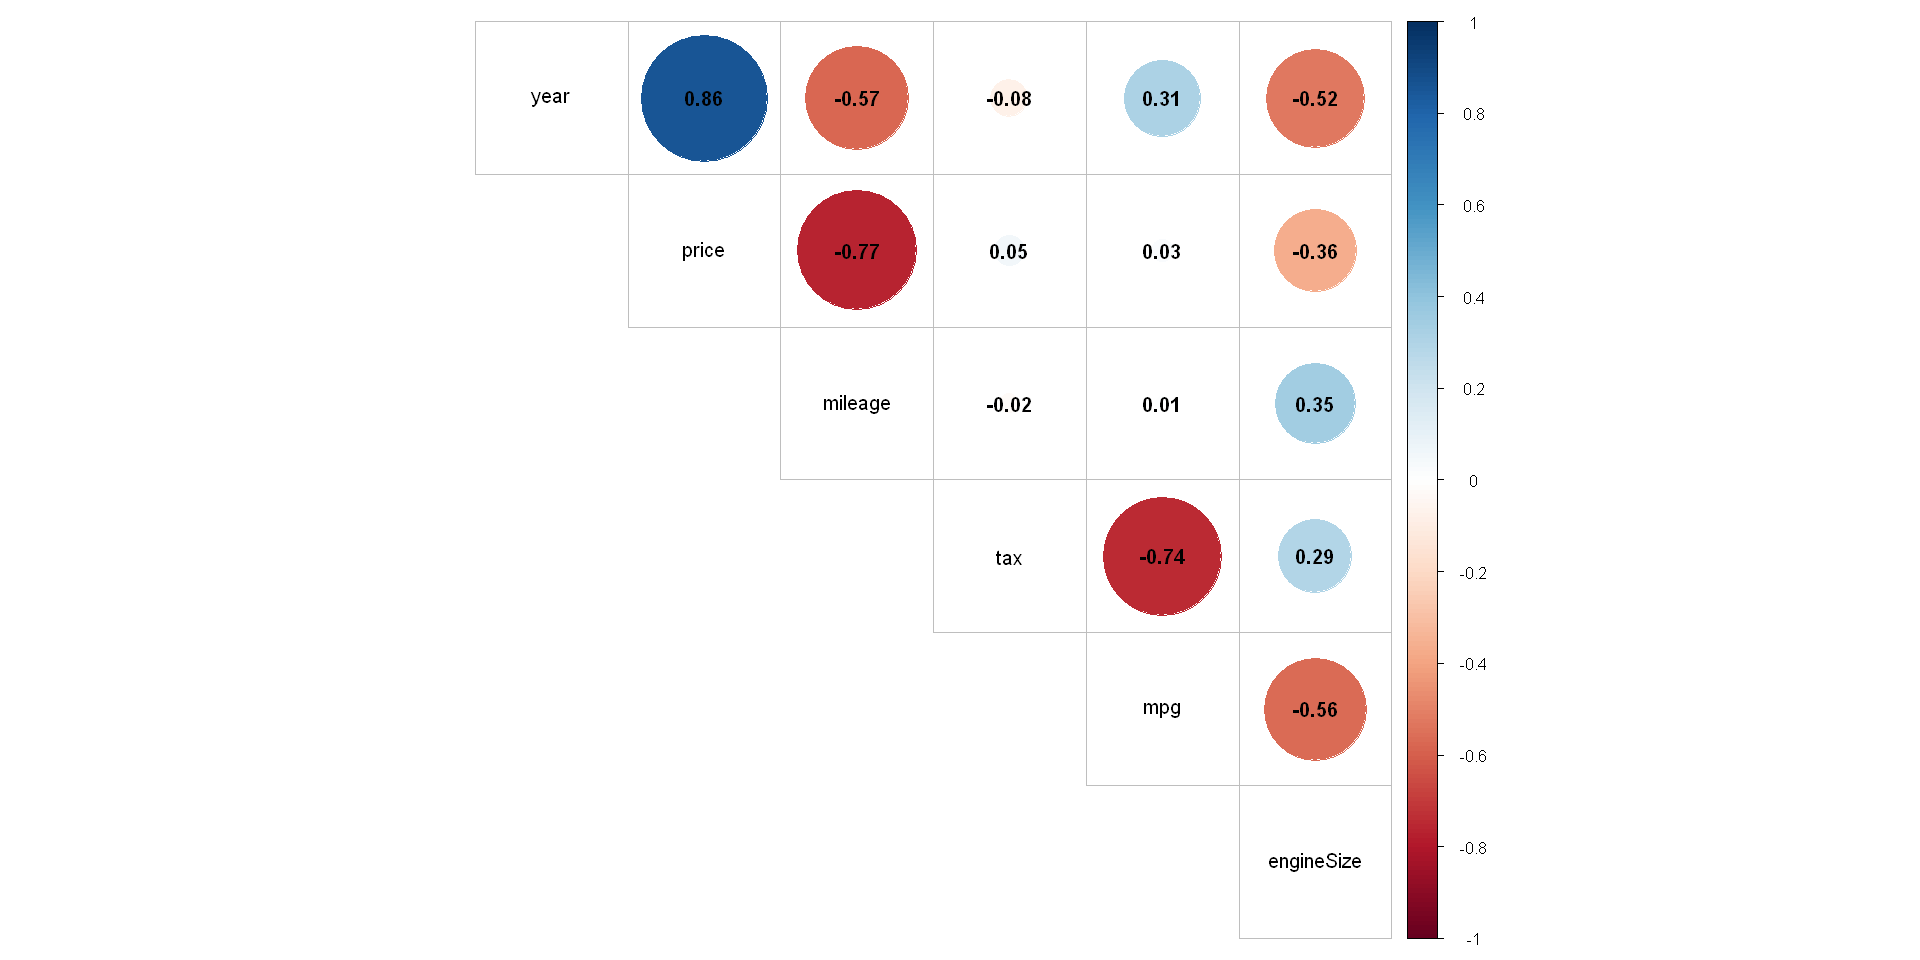

In [63]:
correlation_matrix <- cor(dplyr::select_if(toyota_data %>% filter(as.integer(model) == 2), is.numeric), method = c( "spearman"))
corrplot(correlation_matrix, type = "upper", 
         tl.col = "black", tl.srt = 45,  addCoef.col = 'black', tl.pos = 'd')

In [64]:
# toyota_sample %>% filter(as.integer(model)== 1)

model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
Auris,2016,13400,Automatic,24610,Hybrid,0,78.5,1.8
Auris,2014,9949,Automatic,66900,Hybrid,0,74.3,1.8
Auris,2016,12995,Automatic,40133,Hybrid,0,78.5,1.8
Auris,2014,6700,Manual,47300,Petrol,150,47.9,1.6
Auris,2016,11295,Automatic,50211,Hybrid,0,72.4,1.8
Auris,2016,14995,Automatic,6113,Hybrid,0,78.5,1.8
Auris,2014,6499,Manual,87650,Diesel,0,74.3,1.4
Auris,2016,13499,Automatic,71329,Hybrid,0,70.6,1.8
Auris,2016,10795,Manual,28150,Petrol,30,58.9,1.2
Auris,2017,17495,Automatic,21960,Hybrid,0,70.6,1.8


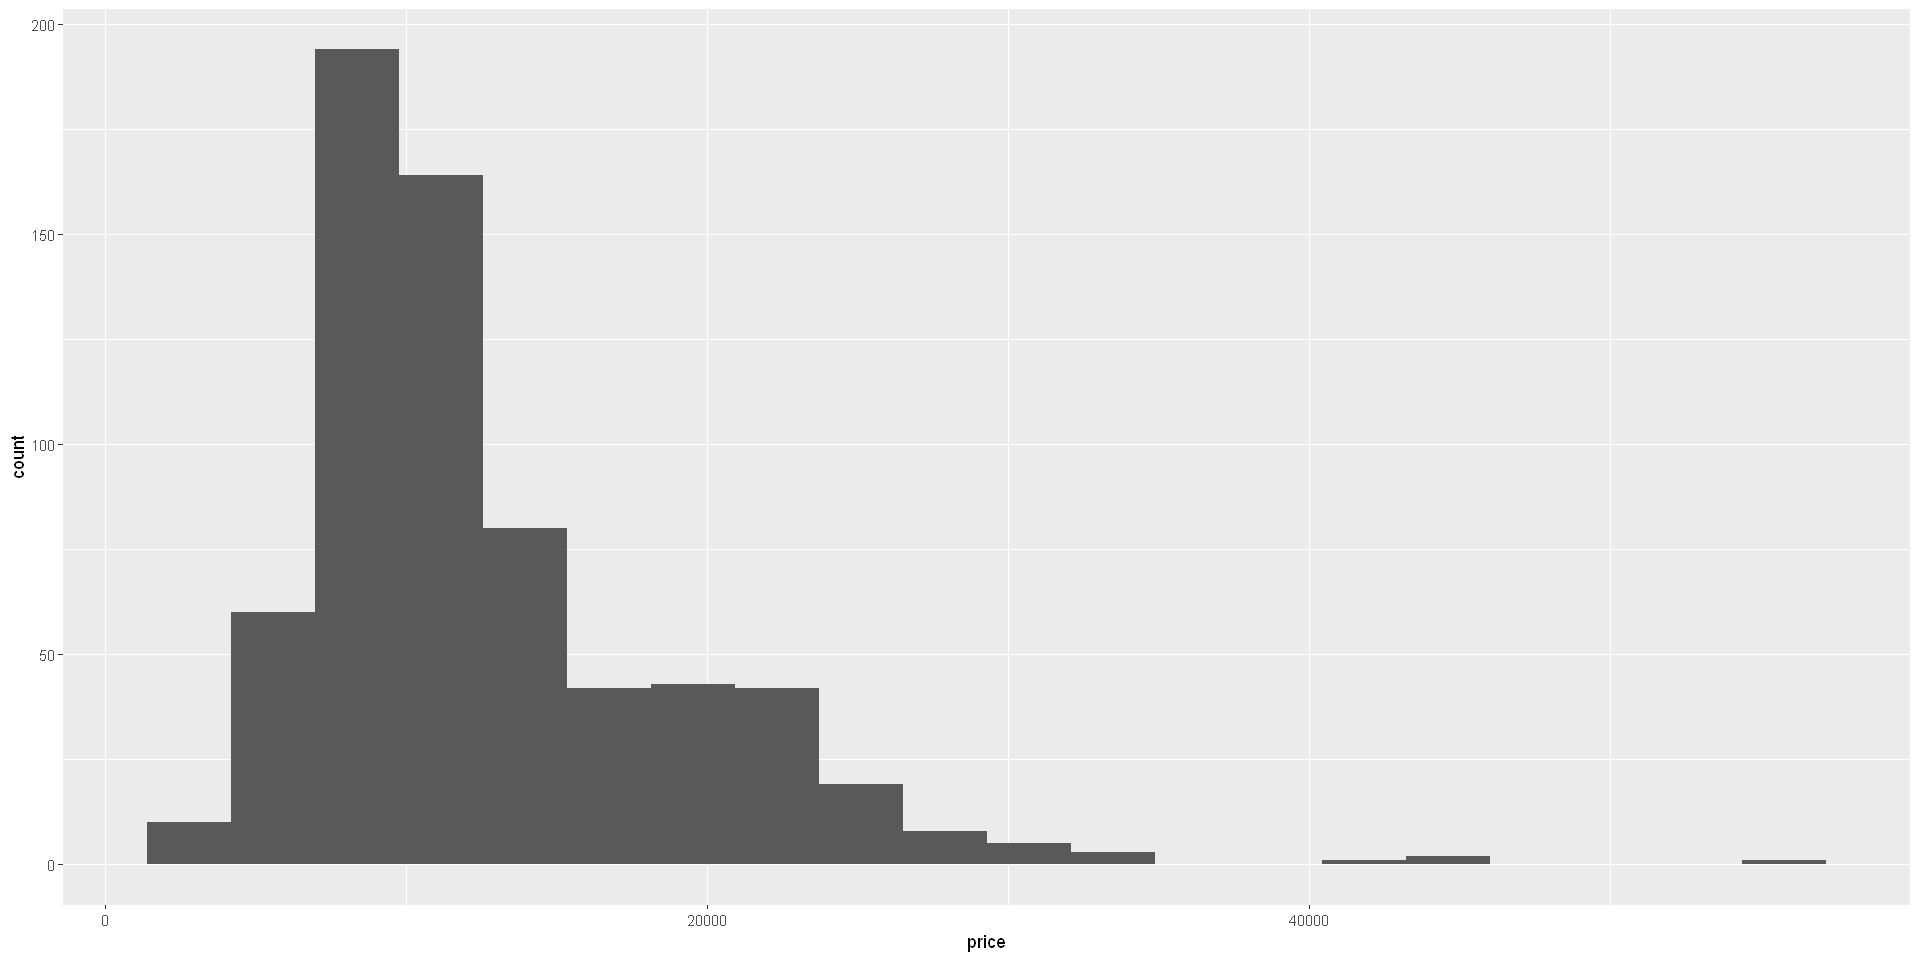

In [65]:
# ggplot(toyota_sample, aes(x=price)) + geom_histogram(bins=20)

In [66]:
summary(toyota_sample)

      model          year          price          transmission    mileage     
  Yaris  :208   Min.   :2000   Min.   : 1995   Automatic:267   Min.   :   10  
  Aygo   :203   1st Qu.:2016   1st Qu.: 8275   Manual   :382   1st Qu.: 9544  
  Auris  : 70   Median :2017   Median :10690   Other    :  0   Median :19575  
  C-HR   : 53   Mean   :2017   Mean   :12619   Semi-Auto: 25   Mean   :22268  
  RAV4   : 46   3rd Qu.:2018   3rd Qu.:14998                   3rd Qu.:30075  
  Corolla: 23   Max.   :2020   Max.   :54991                   Max.   :91500  
 (Other) : 71                                                                 
   fuelType        tax              mpg           engineSize   
 Diesel: 47   Min.   :  0.00   Min.   :  2.80   Min.   :1.000  
 Hybrid:215   1st Qu.:  0.00   1st Qu.: 56.50   1st Qu.:1.000  
 Other : 13   Median :135.00   Median : 64.90   Median :1.500  
 Petrol:399   Mean   : 94.04   Mean   : 63.61   Mean   :1.474  
              3rd Qu.:145.00   3rd Qu.: 72.40   

In [67]:
str(toyota_sample)


'data.frame':	674 obs. of  9 variables:
 $ model       : Factor w/ 18 levels " Auris"," Avensis",..: 3 3 18 18 3 18 3 3 18 3 ...
 $ year        : int  2019 2016 2016 2016 2019 2017 2017 2019 2018 2018 ...
 $ price       : int  9550 7291 9700 11401 9790 14999 7498 8799 13995 8788 ...
 $ transmission: Factor w/ 4 levels "Automatic","Manual",..: 2 4 2 1 2 1 2 2 1 2 ...
 $ mileage     : int  100 31096 15015 20674 6546 3316 25223 14303 9114 14312 ...
 $ fuelType    : Factor w/ 4 levels "Diesel","Hybrid",..: 4 4 4 2 4 2 4 4 2 4 ...
 $ tax         : int  145 0 30 0 145 0 145 145 135 150 ...
 $ mpg         : num  56.5 67 58 86 57.7 78 68.9 56.5 76.3 56.5 ...
 $ engineSize  : num  1 1 1.3 1.5 1 1.5 1 1 1.5 1 ...


In [68]:
table(toyota_data$model, toyota_data$fuelType    )

                
                 Diesel Hybrid Other Petrol
   Auris             42    498     1    171
   Avensis           76      0     0     39
   Aygo               0      0    59   1902
   C-HR               0    352     7    120
   Camry              0     11     0      0
   Corolla            1    181     2     83
   GT86               0      0     0     73
   Hilux             86      0     0      0
   IQ                 0      0     0      8
   Land Cruiser      51      0     0      0
   Prius              0    214    18      0
   PROACE VERSO      15      0     0      0
   RAV4             180    230     5     58
   Supra              0      0     1     11
   Urban Cruiser      1      0     0      3
   Verso             29      0     2     83
   Verso-S            0      0     0      3
   Yaris             22    557    10   1533

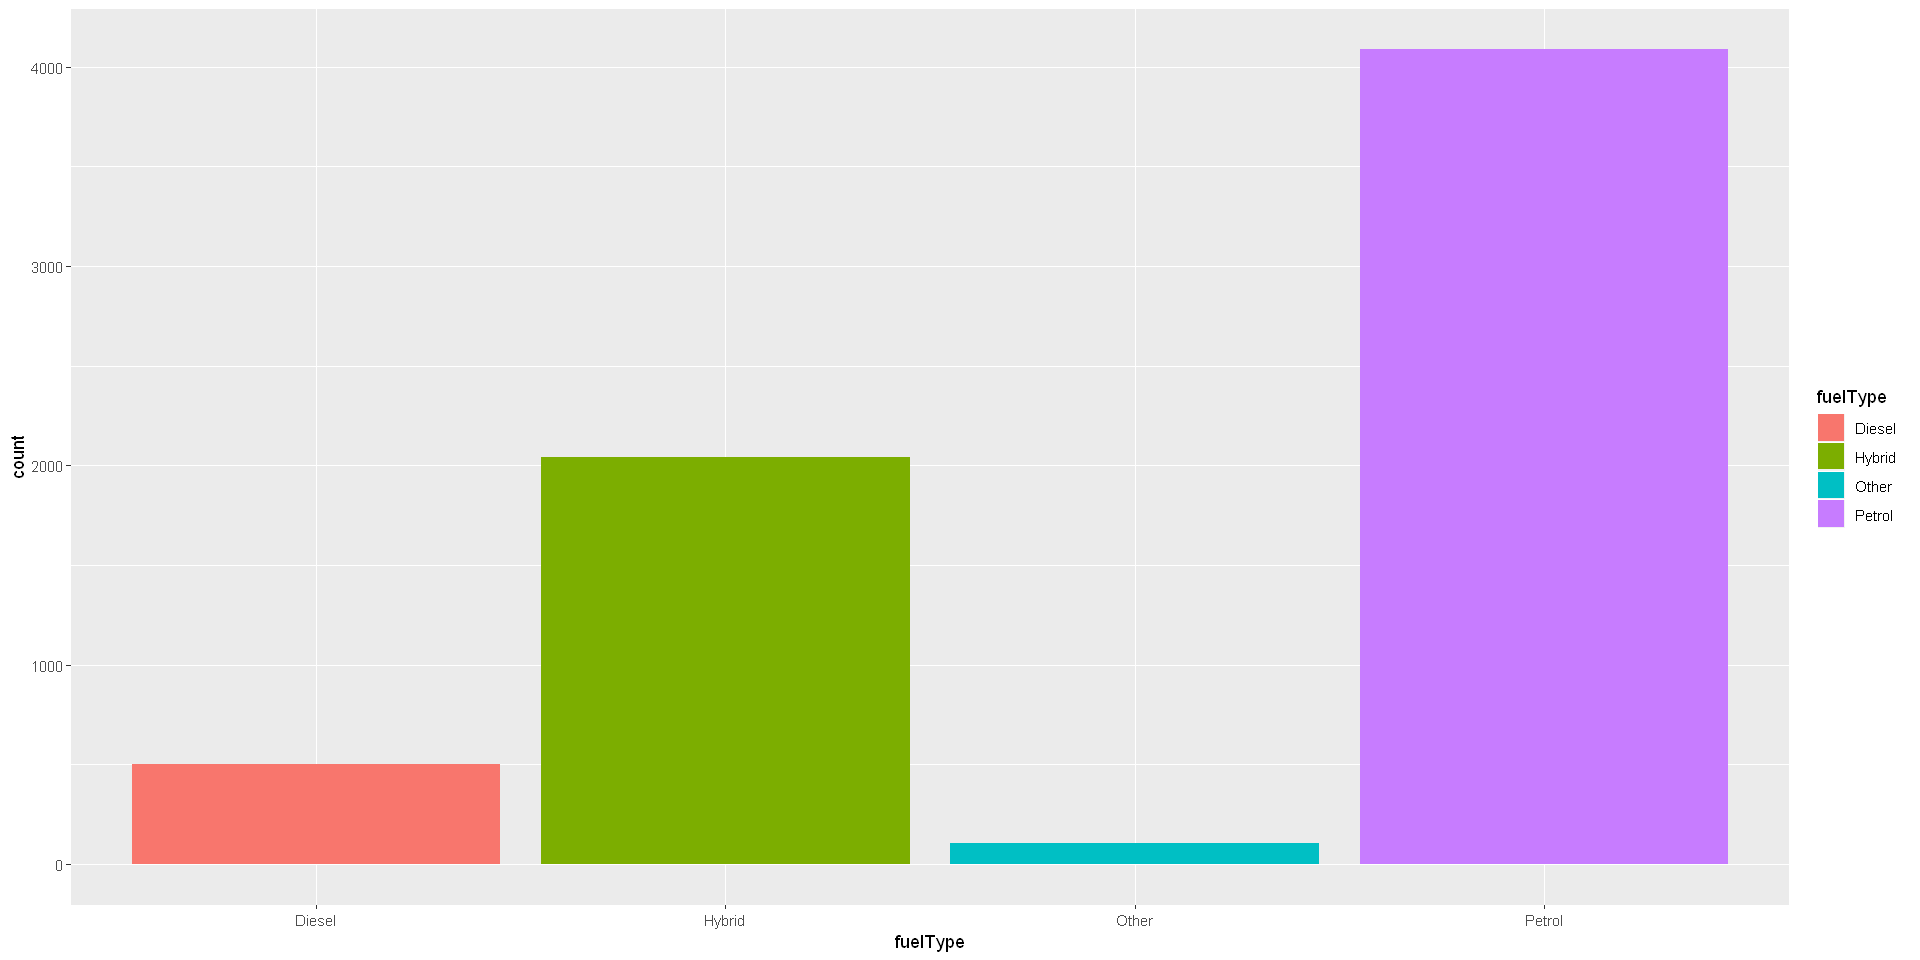

In [69]:
ggplot(toyota_data, aes(x=fuelType, fill=fuelType))+ geom_bar()

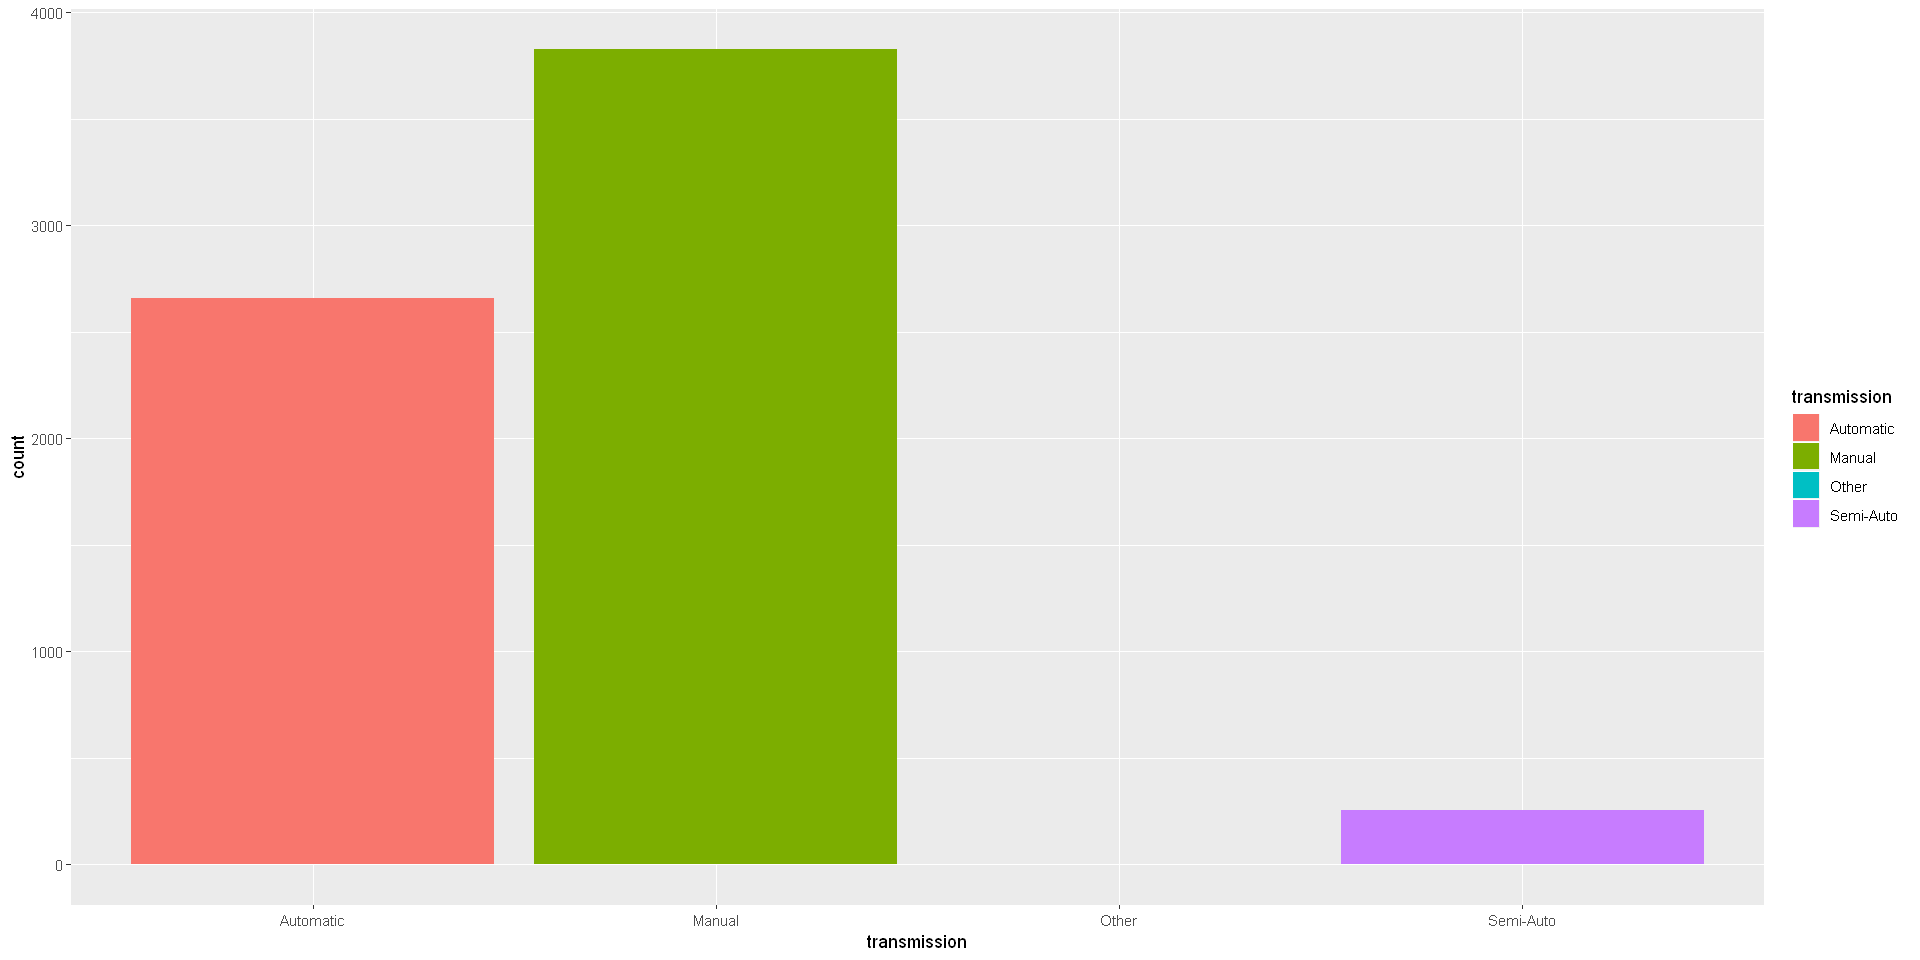

In [70]:
ggplot(toyota_data, aes(x=transmission, fill=transmission))+ geom_bar()